# Lab 7- Data Analysis

Exercises 1-4 are to be completed by Match 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  5674k      0 --:--:--  0:02:38 --:--:-- 4791k   0 --:--:--  0:00:36 --:--:-- 5800k  0 --:--:--  0:00:47 --:--:-- 5807k:00:49 --:--:-- 5770kk      0 --:--:--  0:01:09 --:--:-- 5829k    0 --:--:--  0:01:27 --:--:-- 5827k5792k      0 --:--:--  0:01:43 --:--:-- 5801k--:--  0:01:59 --:--:-- 5811k5793k      0 --:--:--  0:02:11 --:--:-- 5781k02:17 --:--:-- 5794k:26 --:--:-- 4807k


In [2]:
!gunzip SUSY.csv.gz

In [1]:
ls -lh

total 7021488
-rw-r--r--@ 1 ziv4675  staff   656K Feb 22 16:07 1442 Test 2 SECC Test Questions Ch 13 and Ch 14.pdf
-rw-r--r--@ 1 ziv4675  staff   941K Feb 10 15:50 BIOL3315_002_Spring 2020_Midtem 1_Practice exam 1.pdf
-rw-r--r--@ 1 ziv4675  staff   200K Feb 26 09:23 BIOL3315_002_Spring 2020_Midterm 2_Practice exam 2.html
-rw-r--r--@ 1 ziv4675  staff   1.1K Mar  1 19:41 Canvas.py
-rw-r--r--@ 1 ziv4675  staff   1.2K Feb 27 17:15 Catarina.Homework5.R
-rw-r--r--@ 1 ziv4675  staff   1.1M Feb  8 22:08 CatarinaHomework2.ipynb
-rw-r--r--@ 1 ziv4675  staff   2.0K Mar  6 10:28 CatarinaHomework6.R
-rw-r--r--@ 1 ziv4675  staff   6.8M Feb 15 15:04 Catarina_Homework3.ipynb
-rw-r--r--@ 1 ziv4675  staff   4.0M Feb  7 09:36 Chapter 4_Inheritance Patterns of Single Genes and Gene InteractionsPart 1 - Tagged.pdf
-rw-r--r--@ 1 ziv4675  staff   2.0M Feb  7 09:49 Chapter 4_Inheritance Patterns of Single Genes and Gene InteractionsPart 2 - Tagged.pdf
-rw-r--r--@ 1 ziv4675  staff   5.0M Mar 14 23:22 Chapter 7

The data is provided as a comma separated file.

In [1]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [2]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [3]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [4]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [5]:
FeatureNames

['R',
 'S_R',
 'dPhi_r_b',
 'cos_theta_r1',
 'M_R',
 'M_TR_2',
 'MT2',
 'M_Delta_R',
 'MET_rel',
 'axial_MET']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [8]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [9]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [13]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


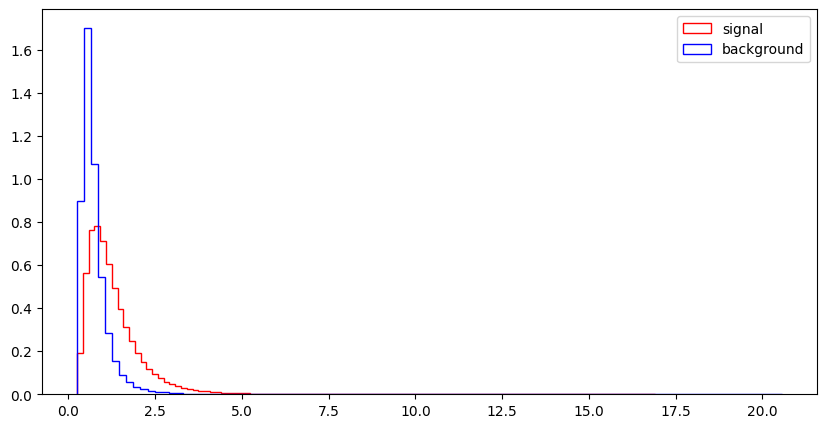

l_1_eta


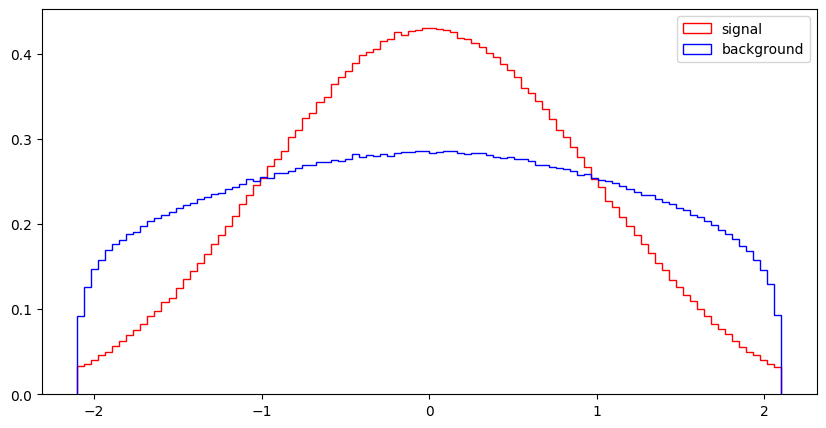

l_1_phi


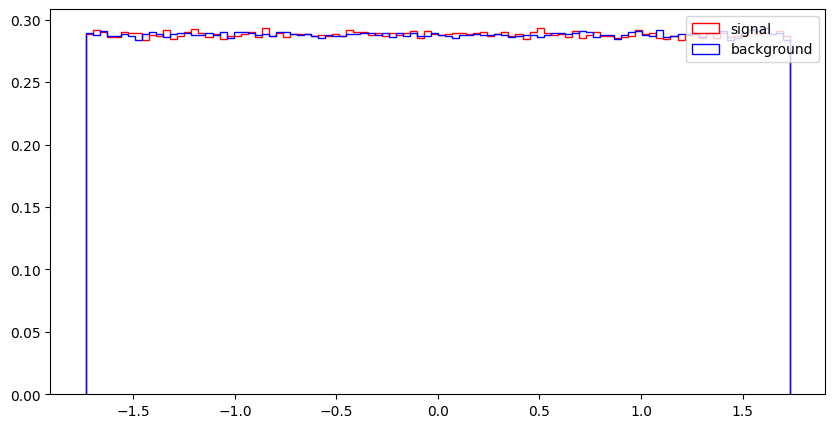

l_2_pT


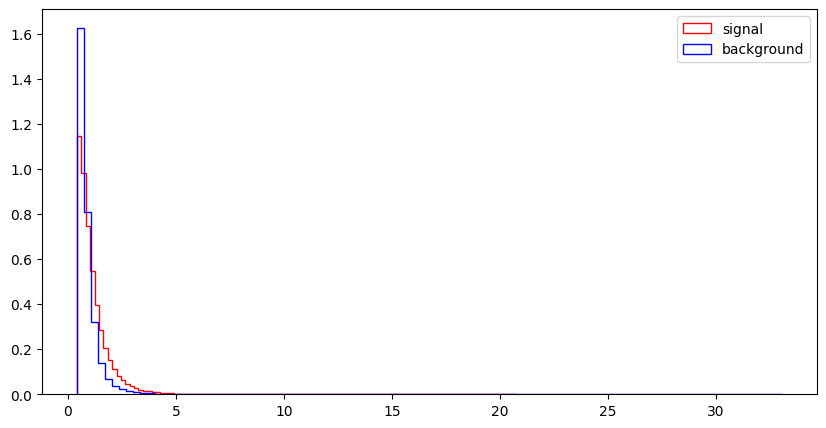

l_2_eta


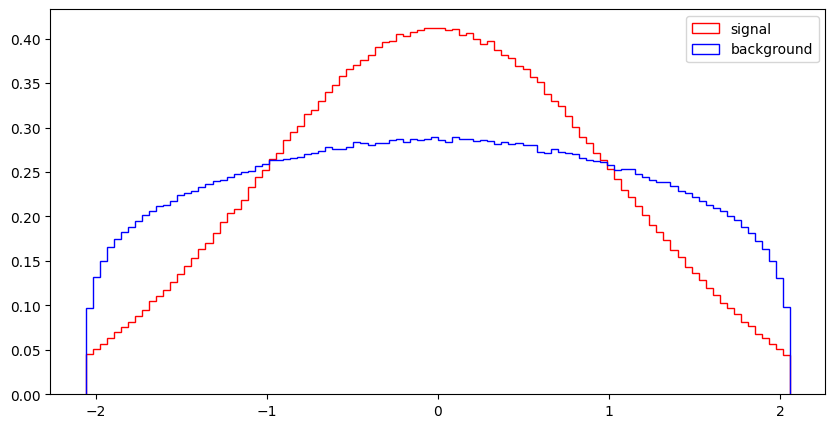

l_2_phi


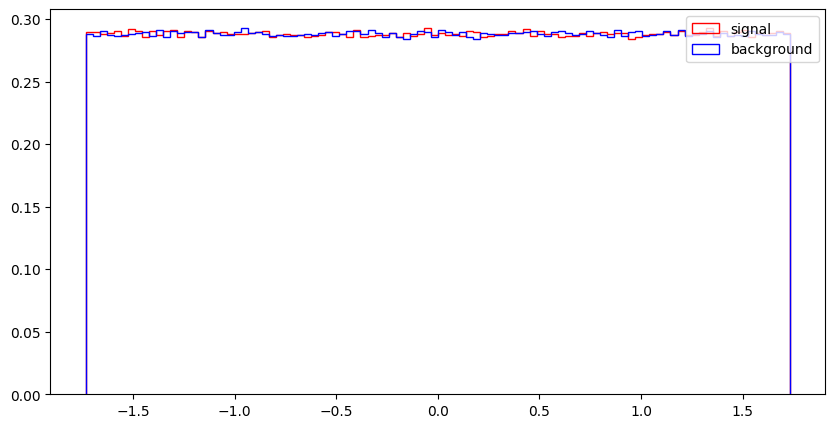

MET


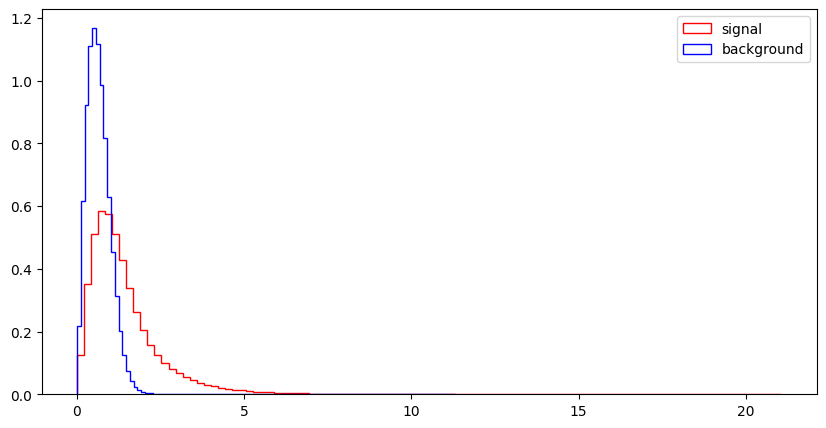

MET_phi


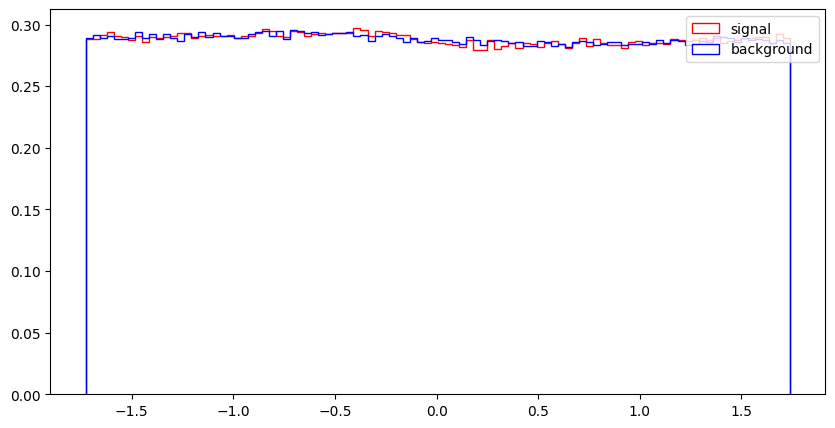

MET_rel


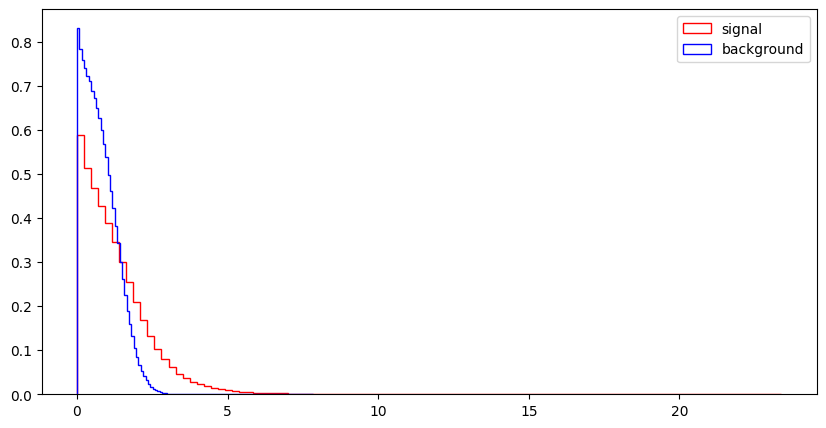

axial_MET


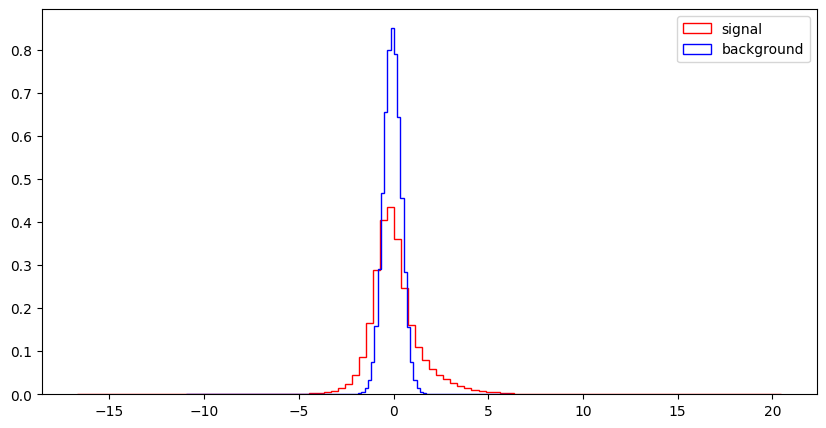

M_R


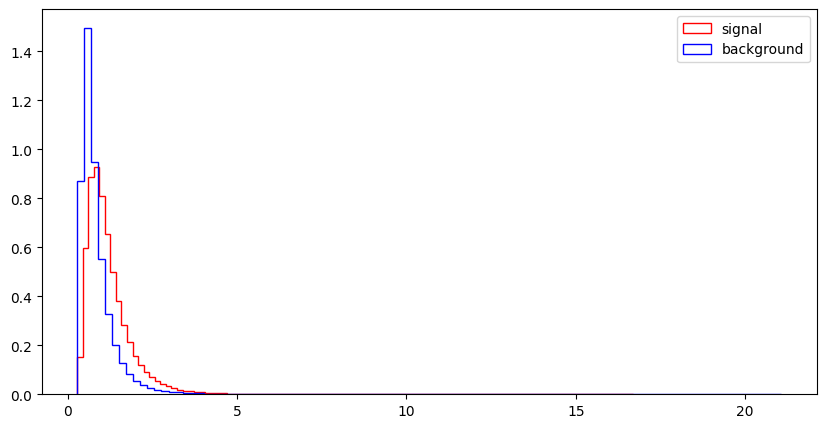

M_TR_2


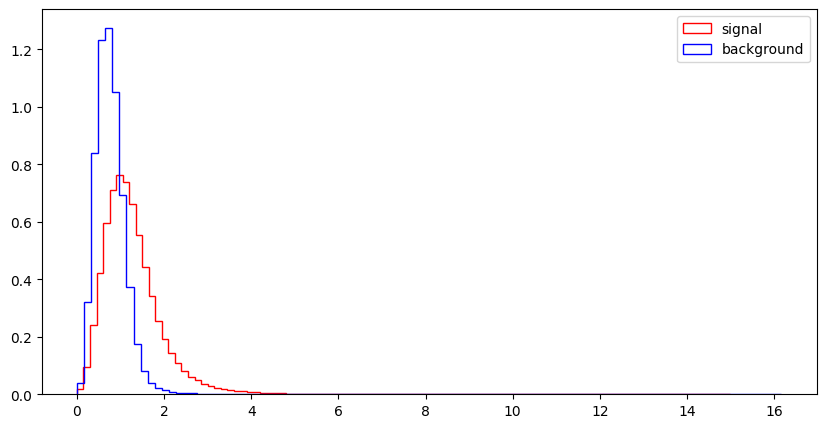

R


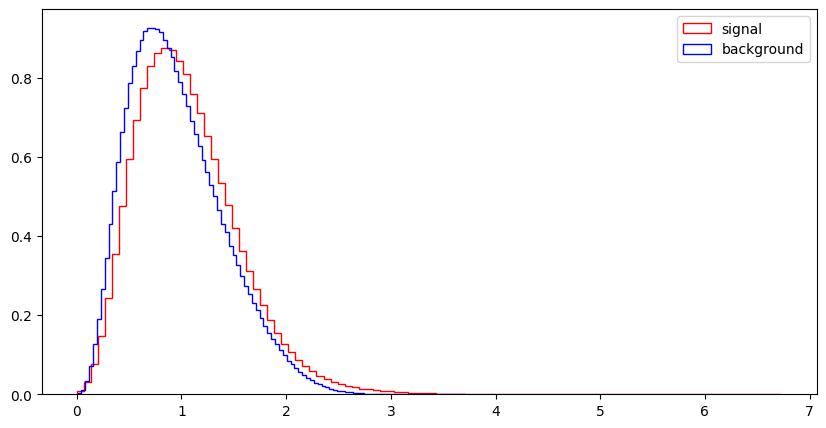

MT2


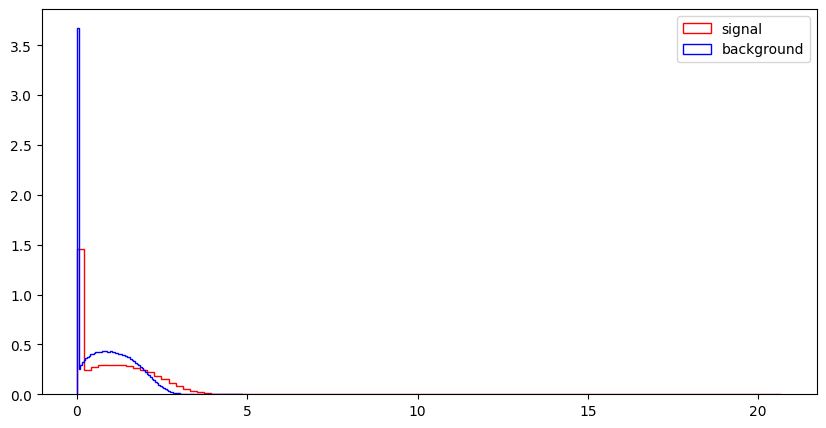

S_R


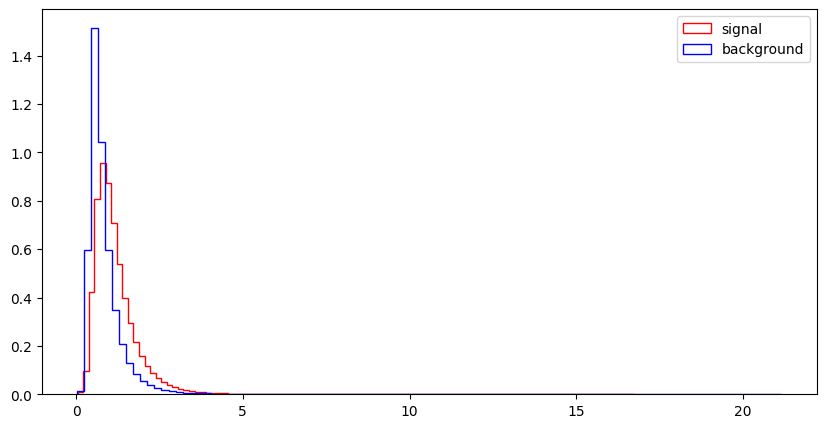

M_Delta_R


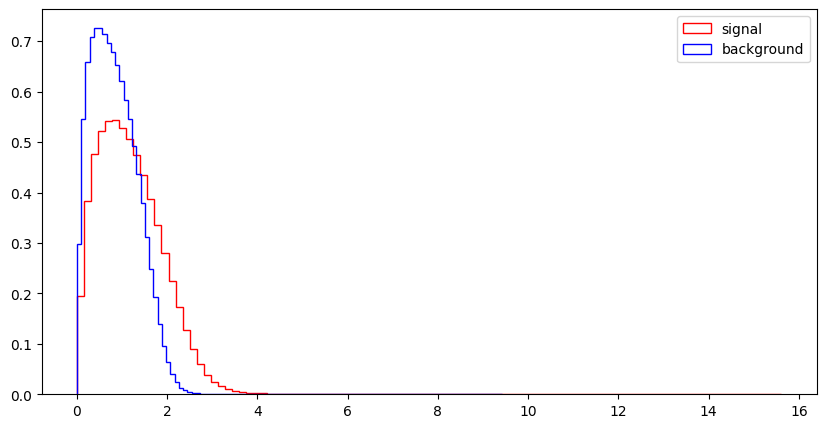

dPhi_r_b


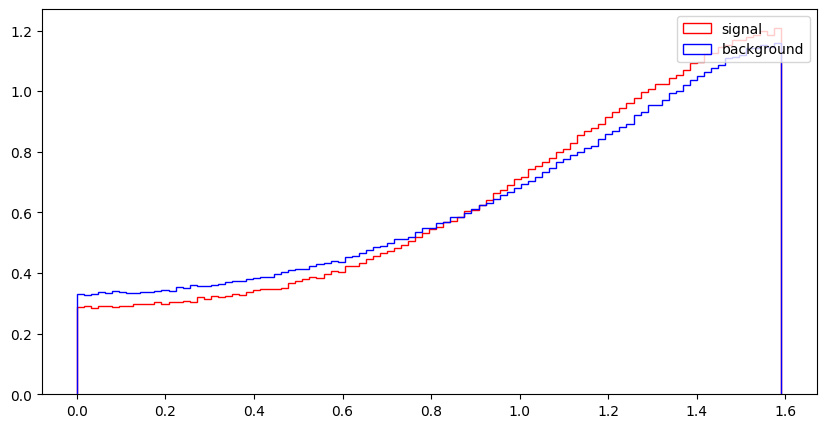

cos_theta_r1


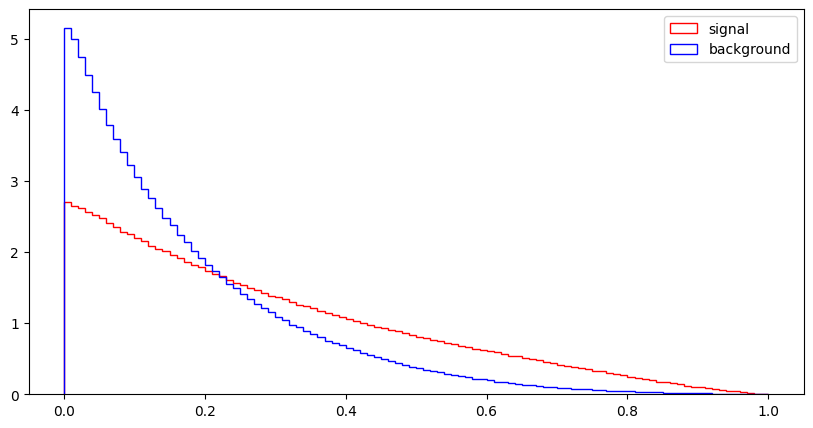

In [12]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

In [14]:
df.columns

Index(['signal', 'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',
       'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'],
      dtype='object')

l_1_eta


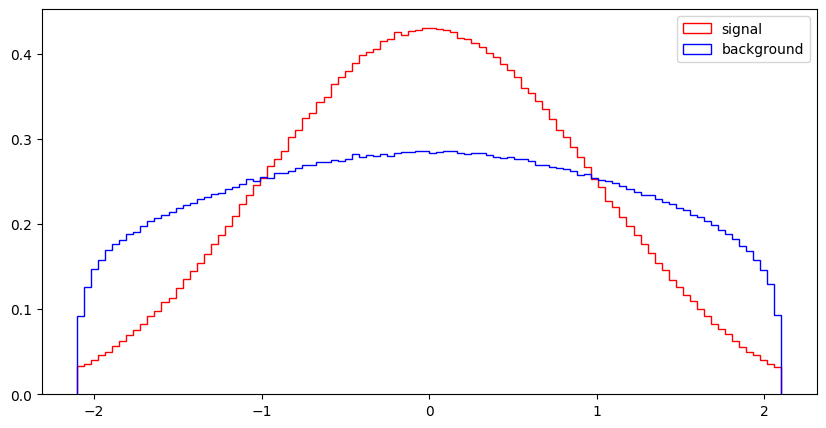

l_1_phi


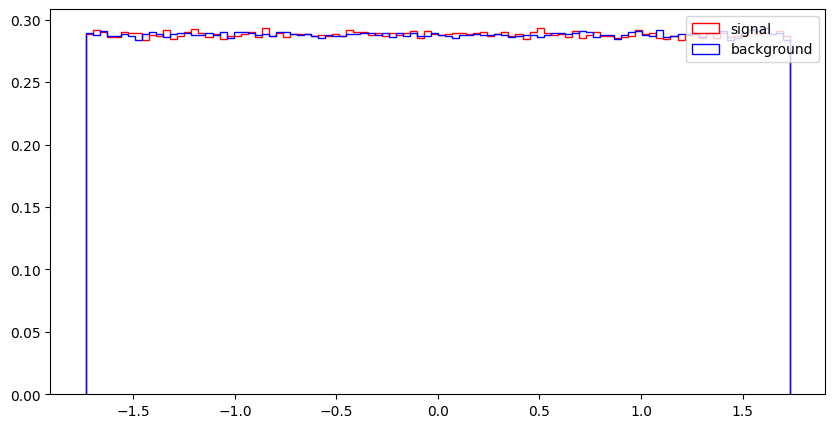

l_2_pT


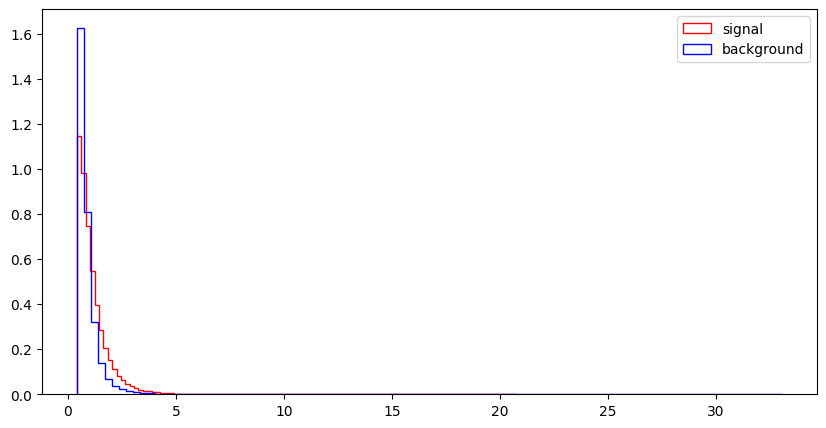

l_2_eta


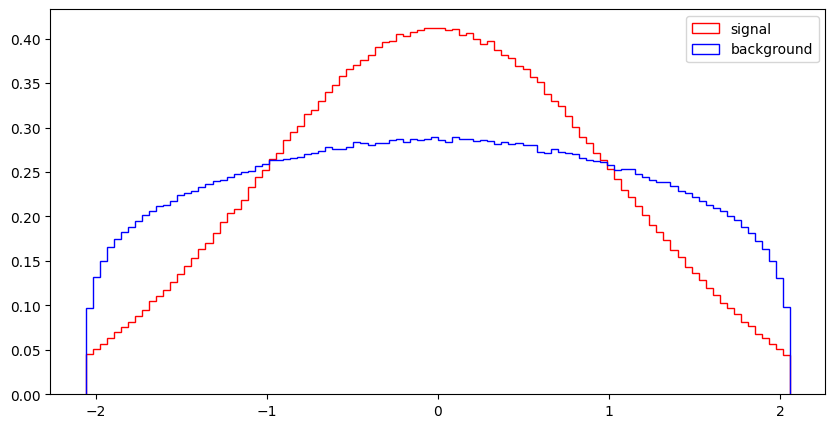

l_2_phi


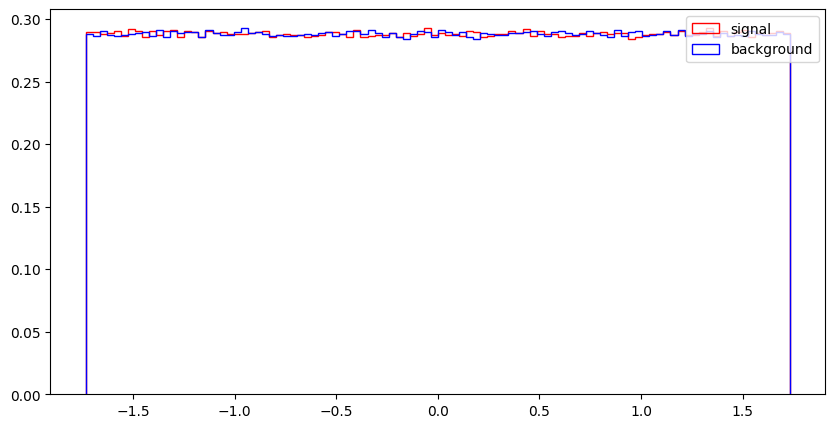

MET


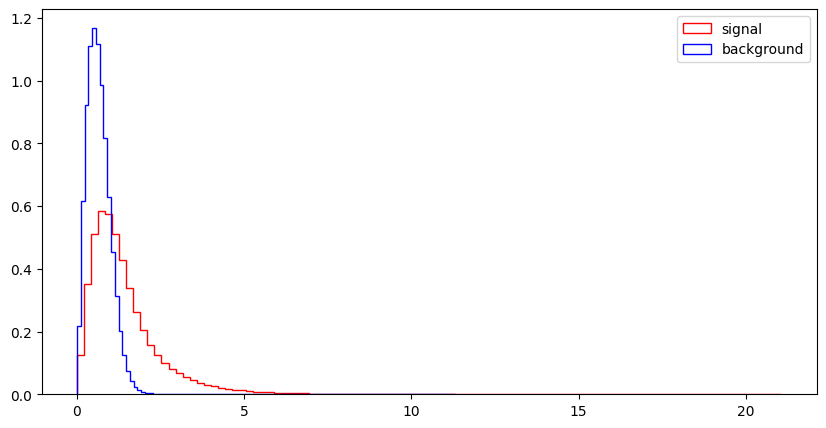

MET_phi


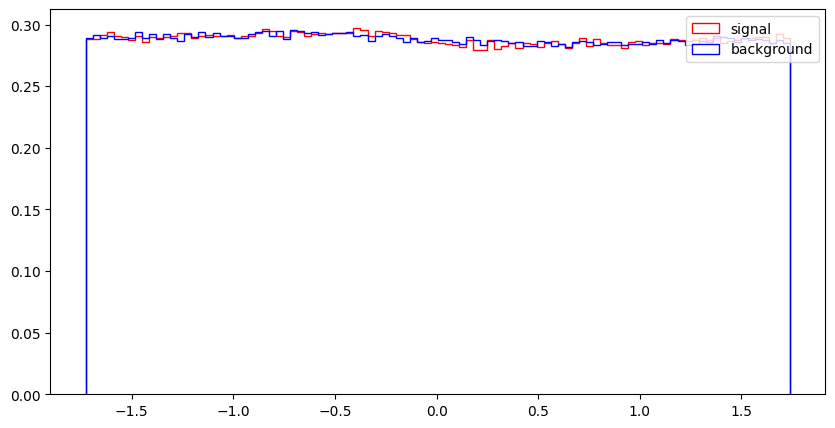

In [25]:
##Plots for the low level features. 
import numpy as np
for raw in RawNames[1:]:
    print (raw)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[raw]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[raw]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

cos_theta_r1


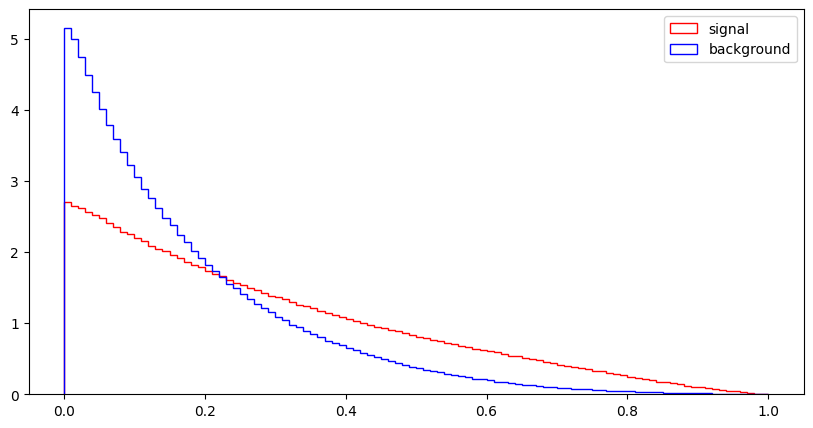

axial_MET


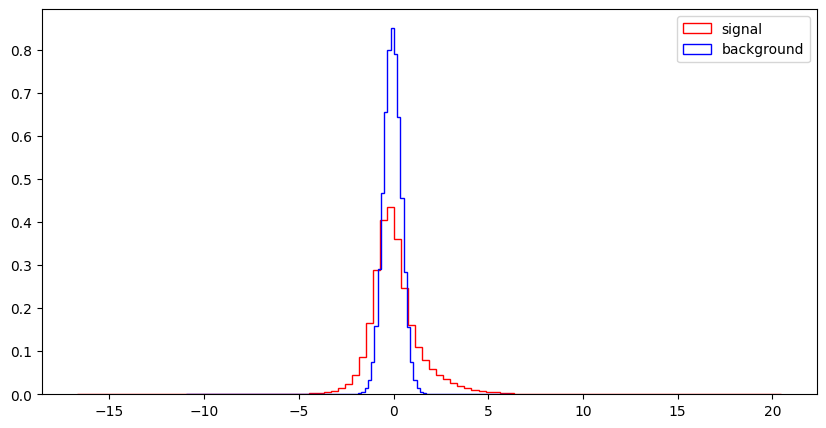

MT2


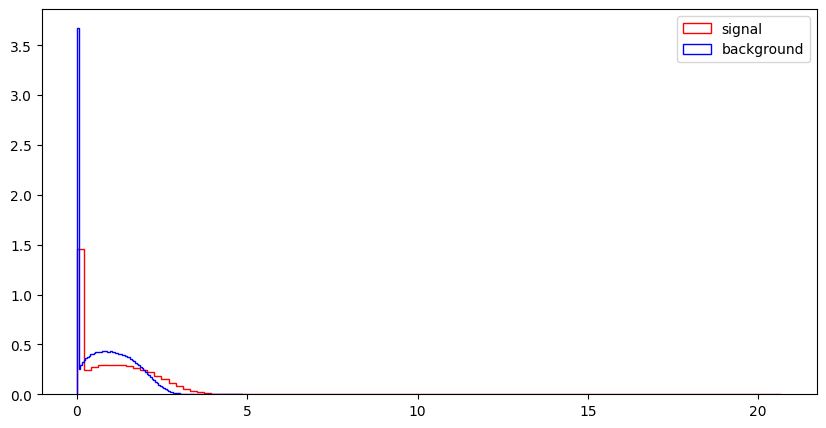

MET_rel


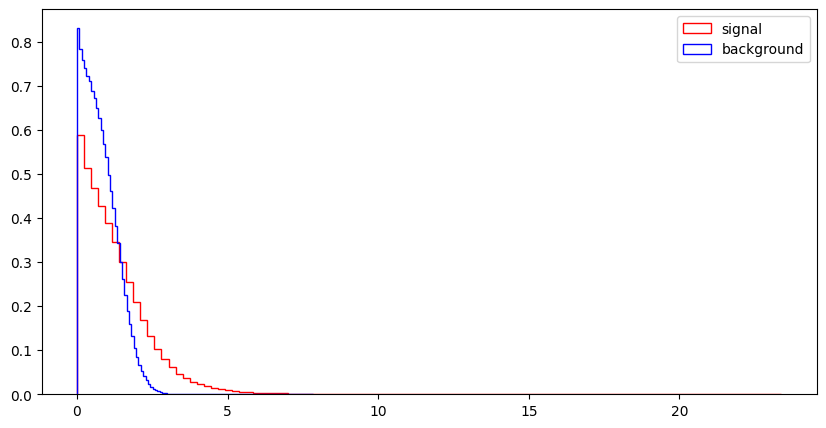

M_R


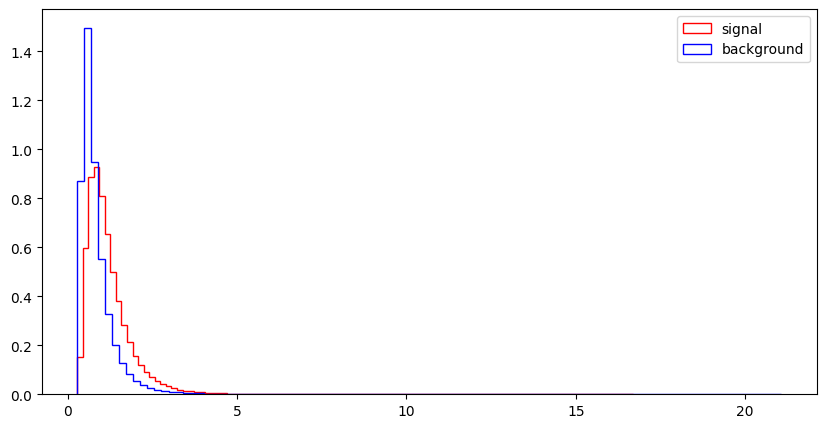

M_TR_2


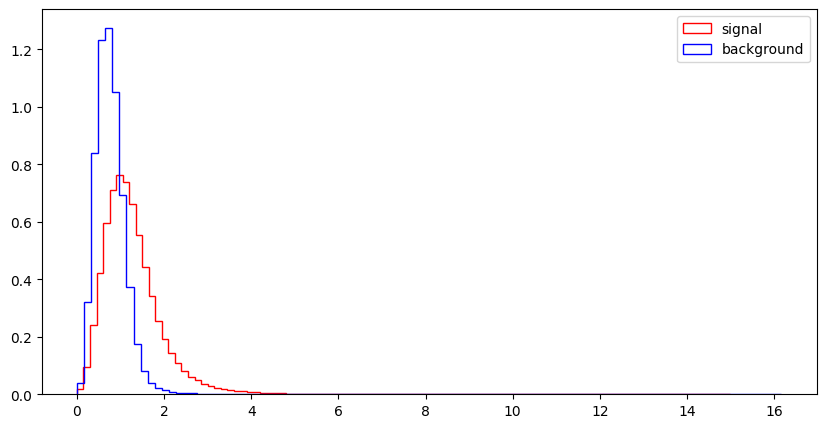

S_R


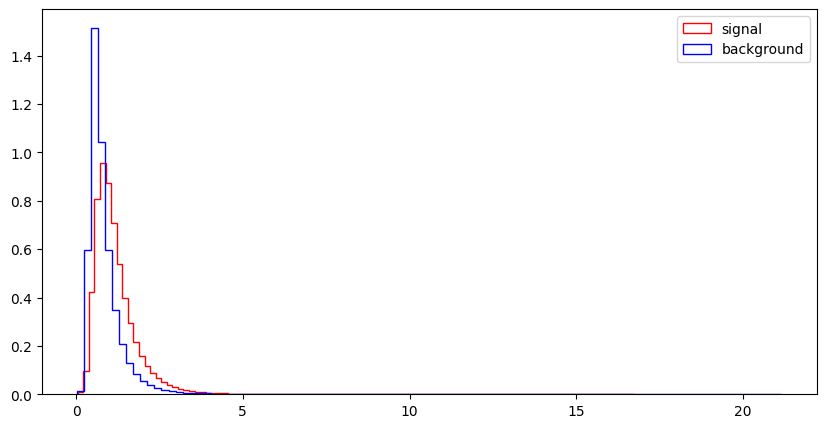

M_Delta_R


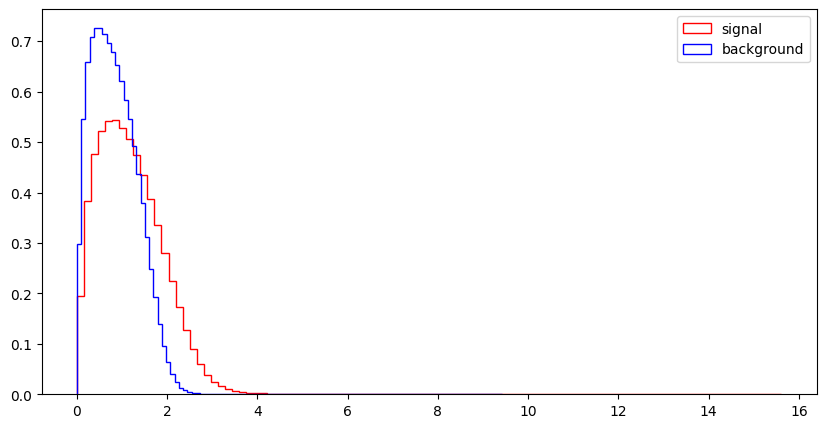

R


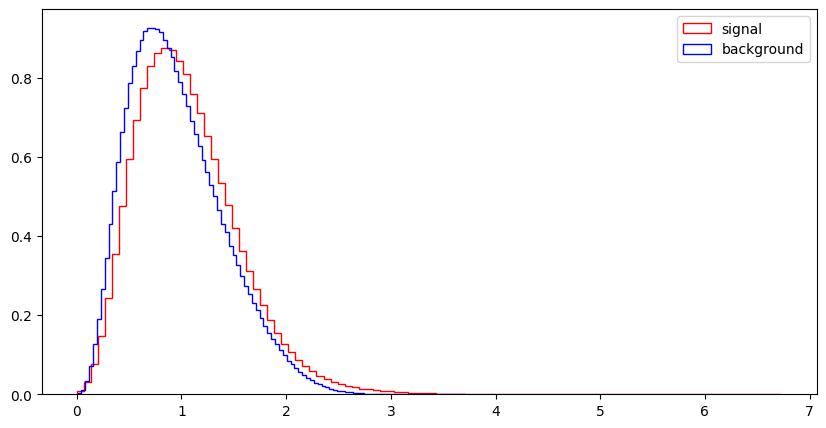

In [24]:
##Plots for the high level features. 
import numpy as np
for feat in FeatureNames[1:]:
    print (feat)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[feat]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[feat]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY and Higgs samples, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

Pairplots for low-level features:


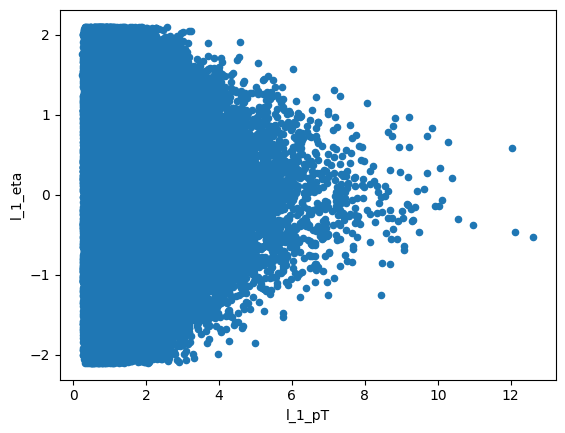

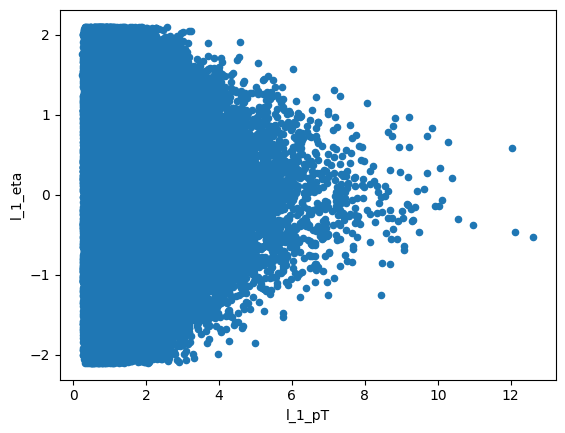

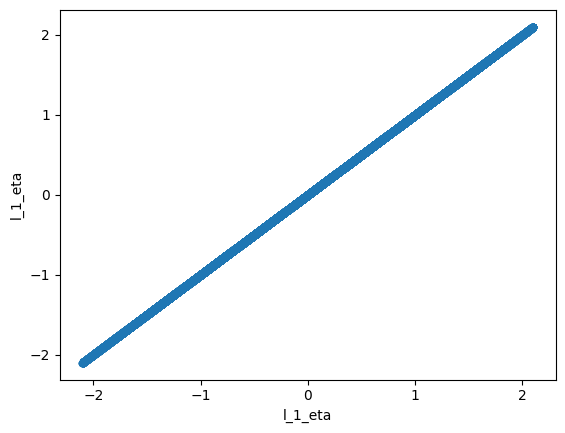

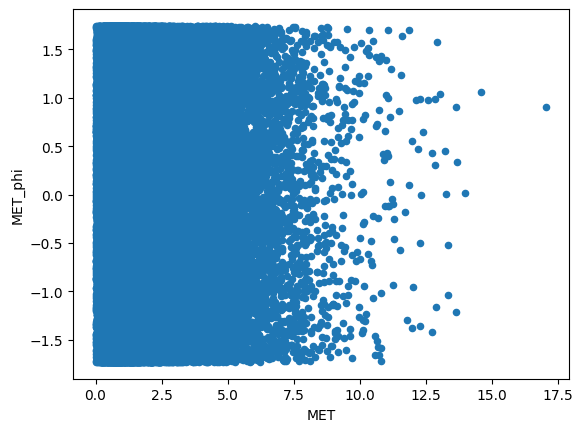

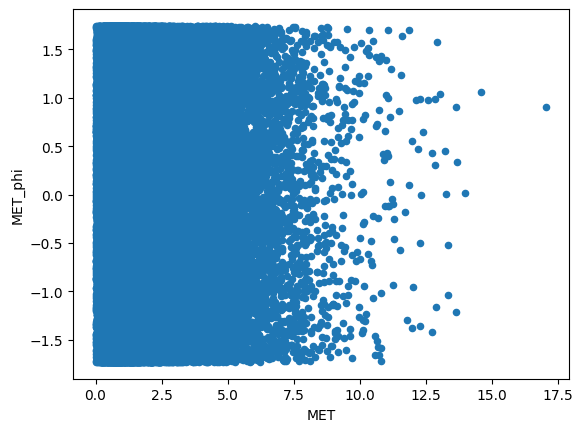

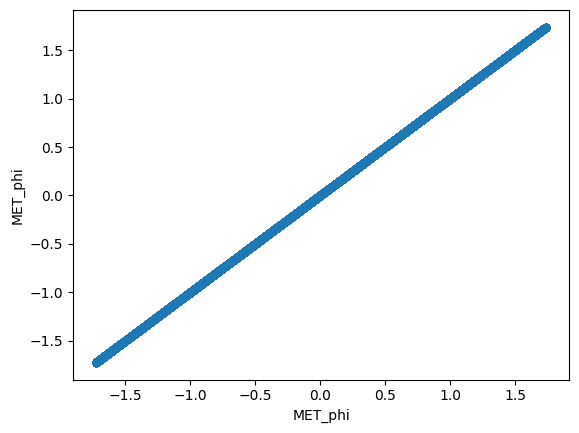

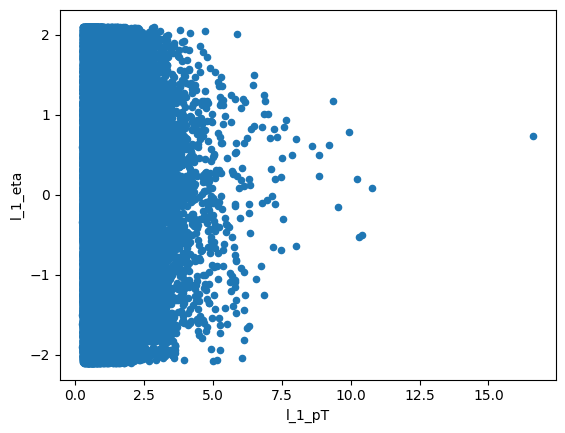

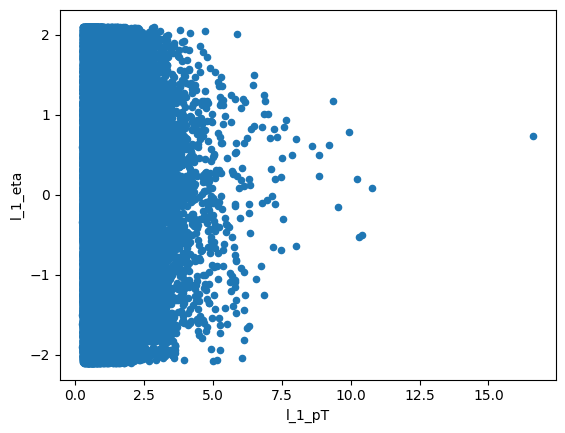

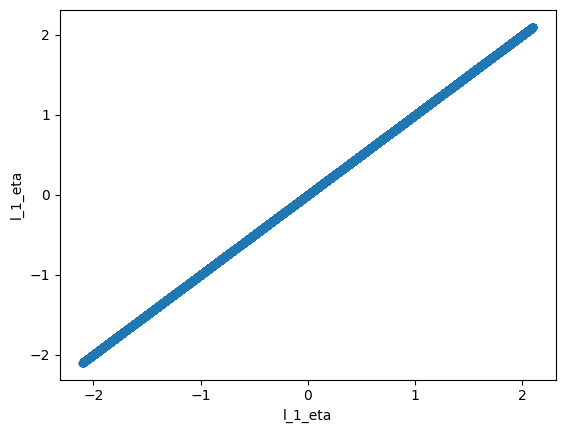

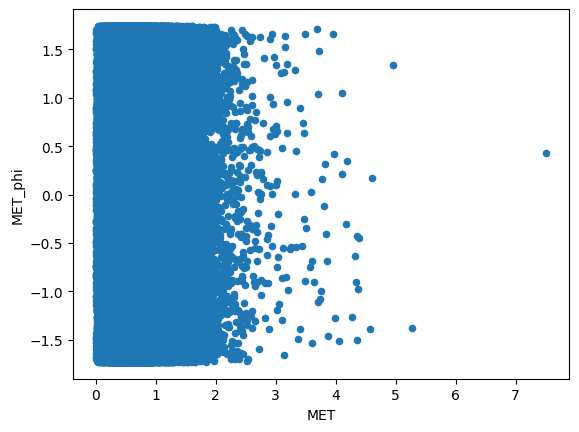

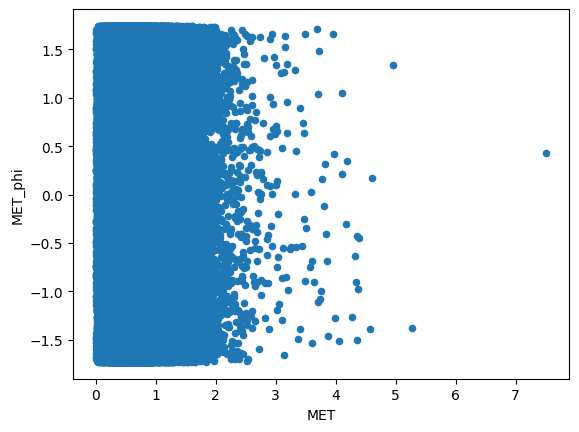

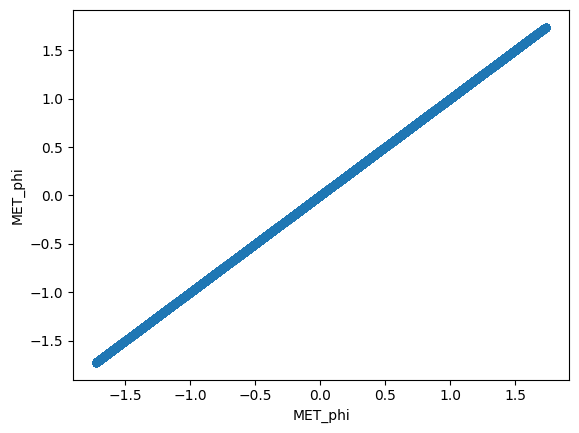

Pairplots for high-level features:


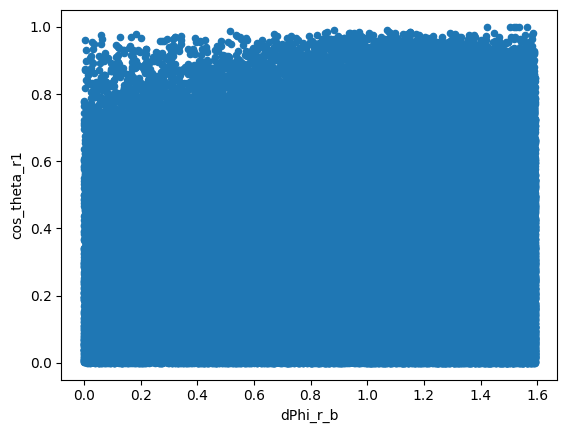

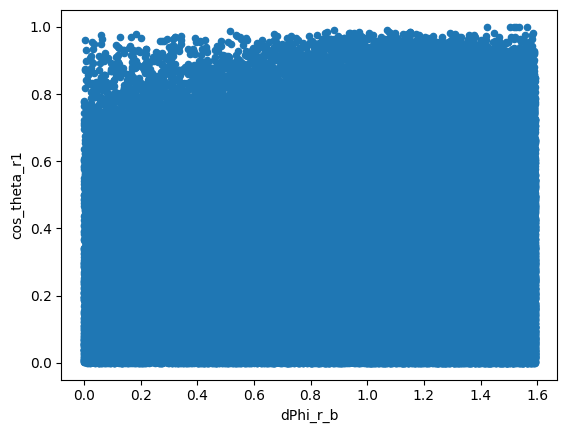

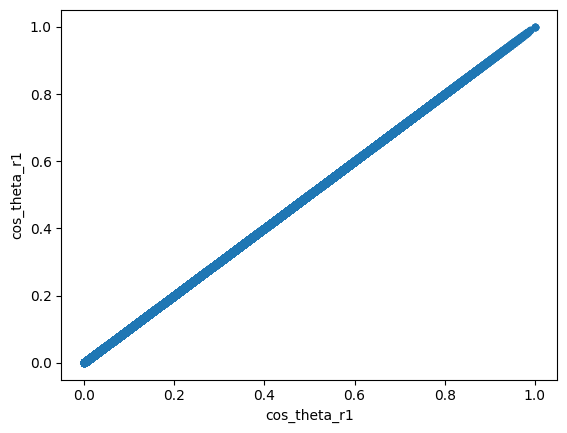

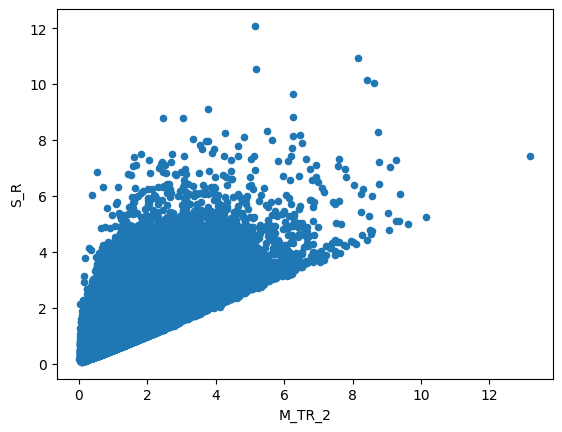

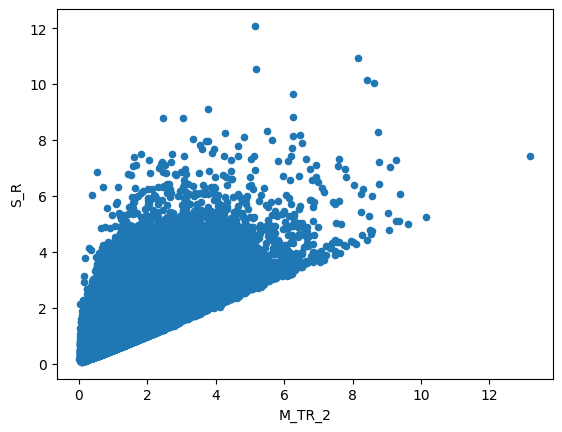

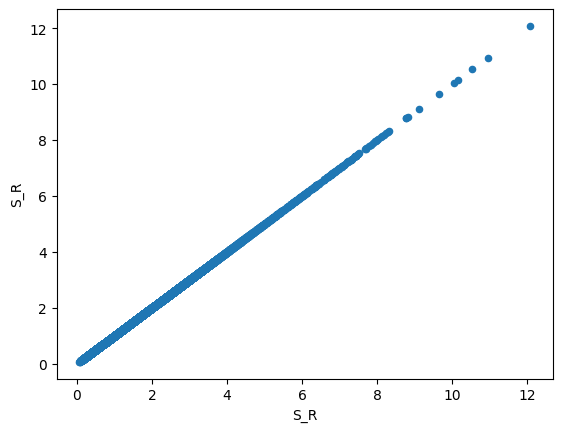

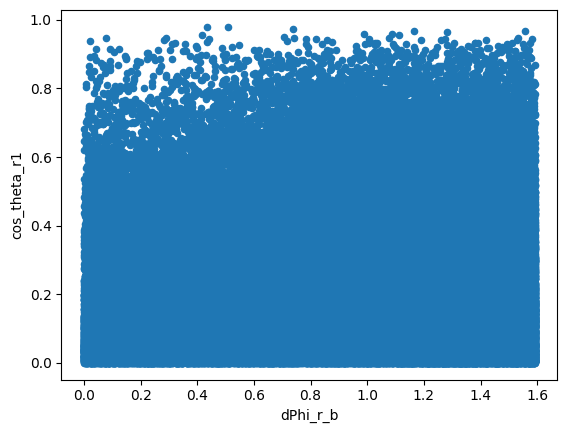

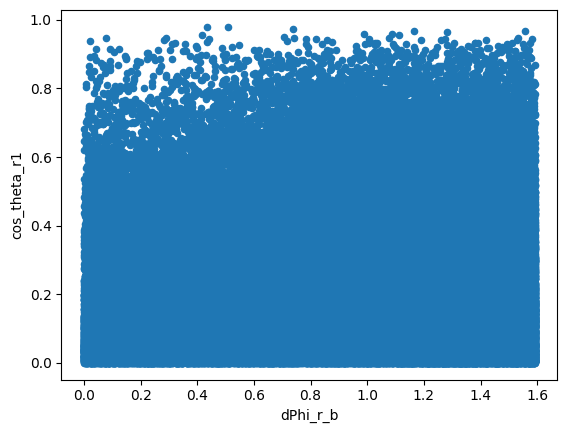

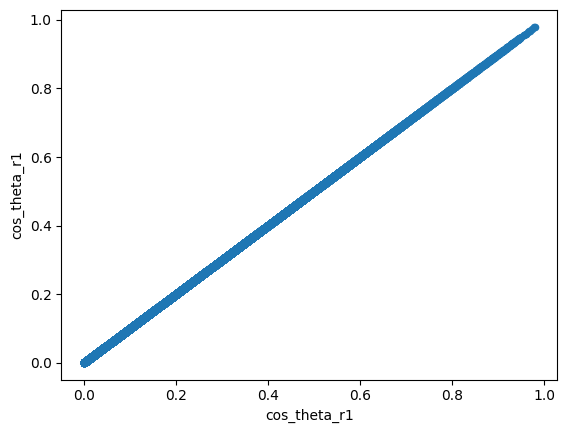

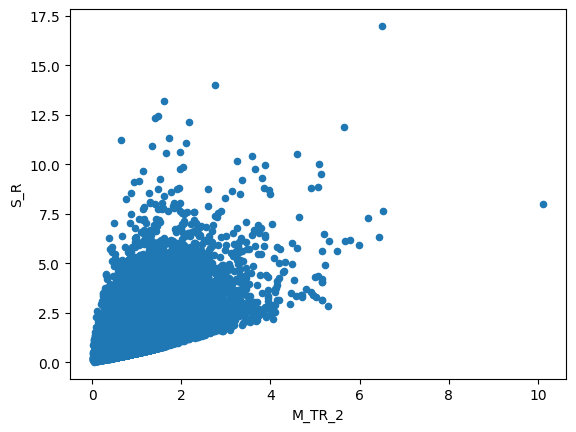

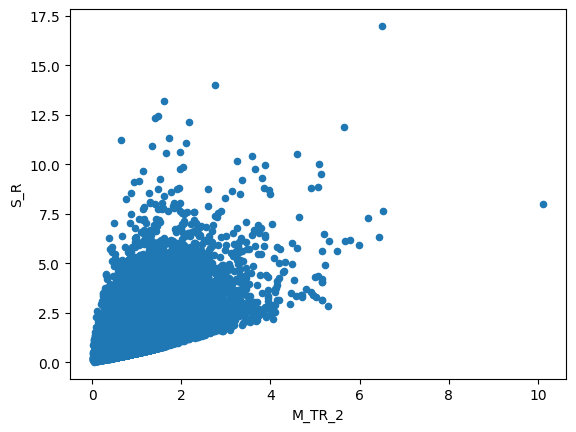

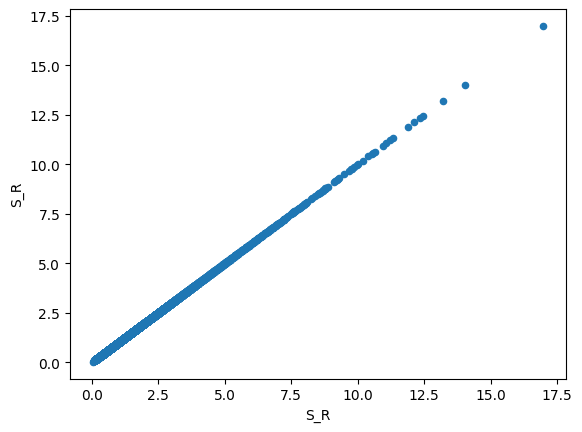

In [66]:
def pair_plots(df, features):
  """
  Creates pair plots for the given data and features.

  Args:
    df: A pandas DataFrame.
    features: A list of columns to include in the pairplots.
  """
##Interates through columns in a a range of (0,6)
  for i in range(0, len(features), 6):
    cols = features[i:i+3]
    df[cols].plot(kind="scatter", x=cols[0], y=cols[1])
    plt.show()
    df[cols].plot(kind="scatter", x=cols[0], y=cols[1])
    plt.show()
    df[cols].plot(kind="scatter", x=cols[1], y=cols[1])
    plt.show()


# Select half a million events
df = df[:500000]

# Separate the signal and background data
df_sig = df[df.signal == 1]
df_bkg = df[df.signal == 0]

# Create pairplots for low-level features
print("Pairplots for low-level features:")
pair_plots(df_sig, RawNames)
pair_plots(df_bkg, RawNames)

# Create pairplots for high-level features
print("Pairplots for high-level features:")
pair_plots(df_sig, FeatureNames)
pair_plots(df_bkg, FeatureNames)


Text(0.5, 0.98, 'Pairplots for High-Level Features (Background)')

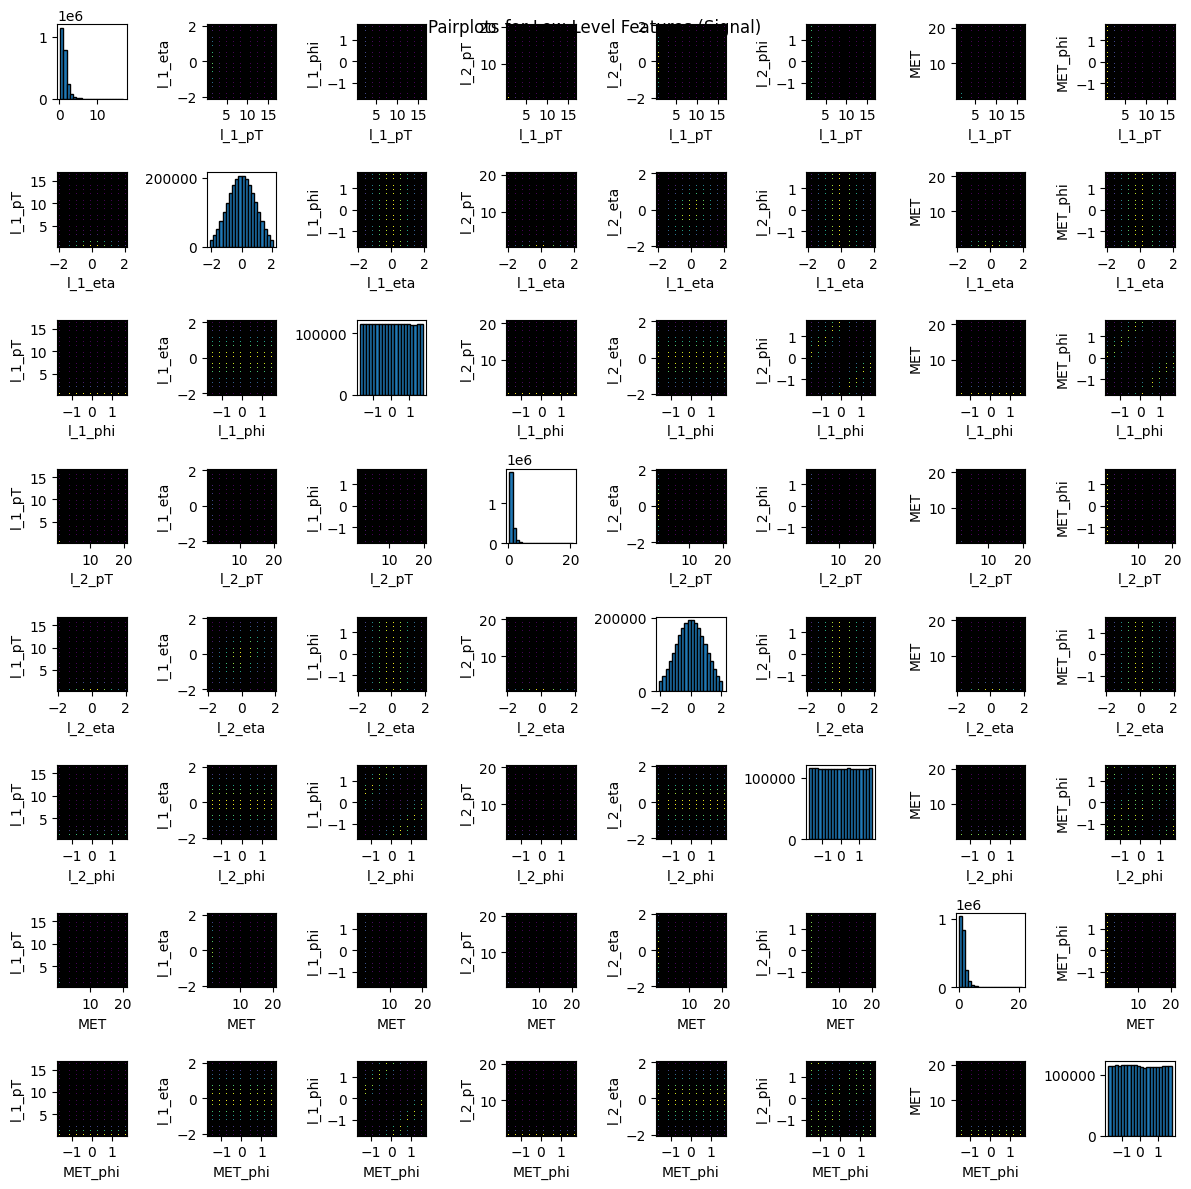

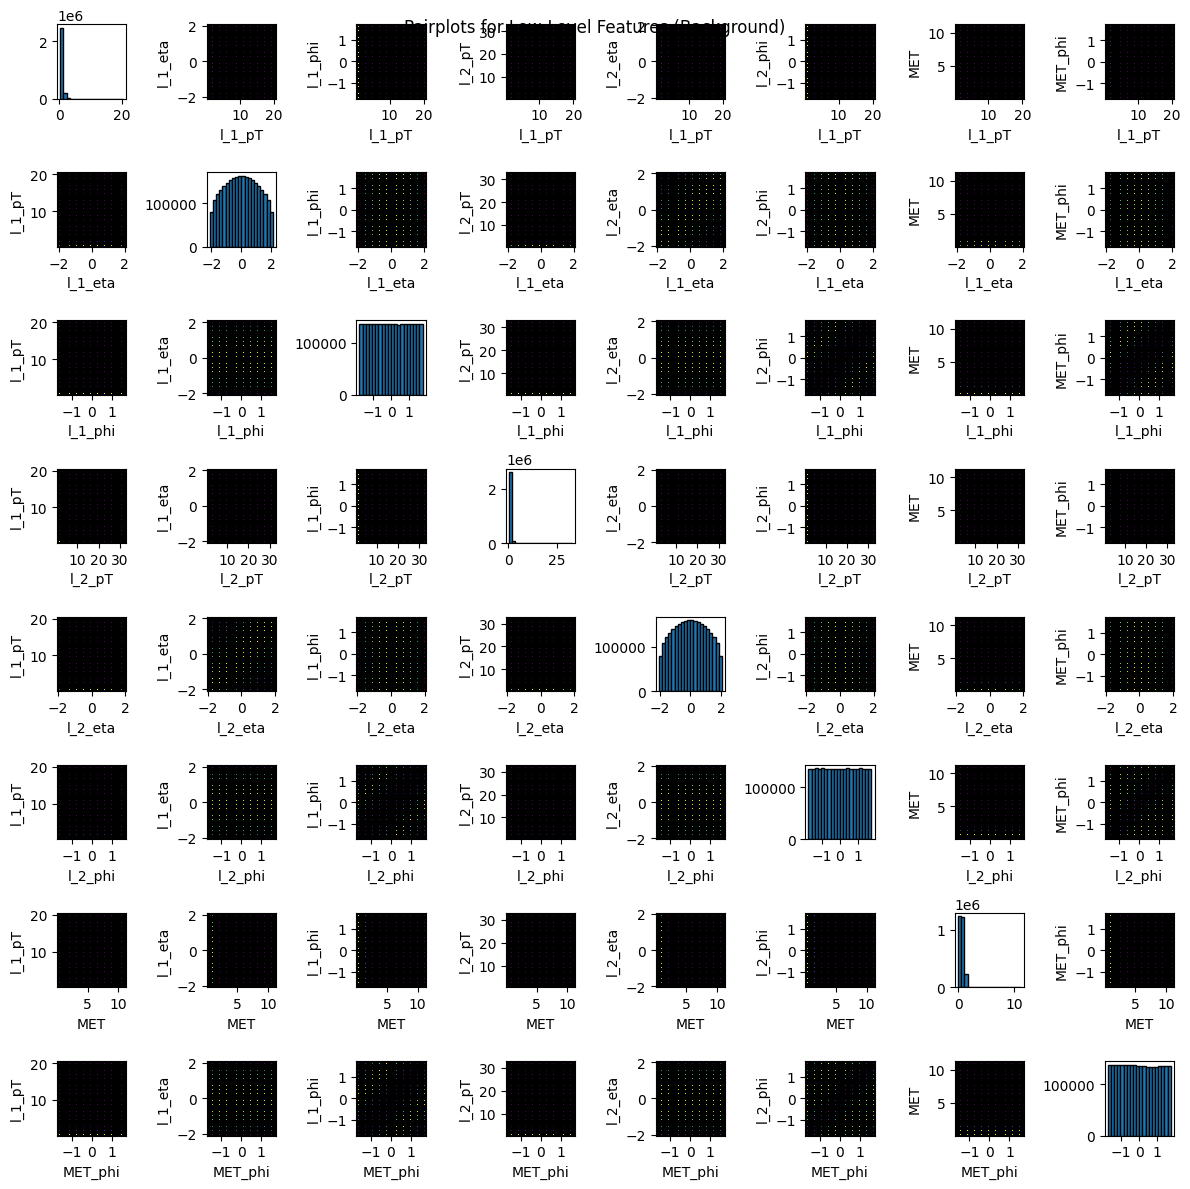

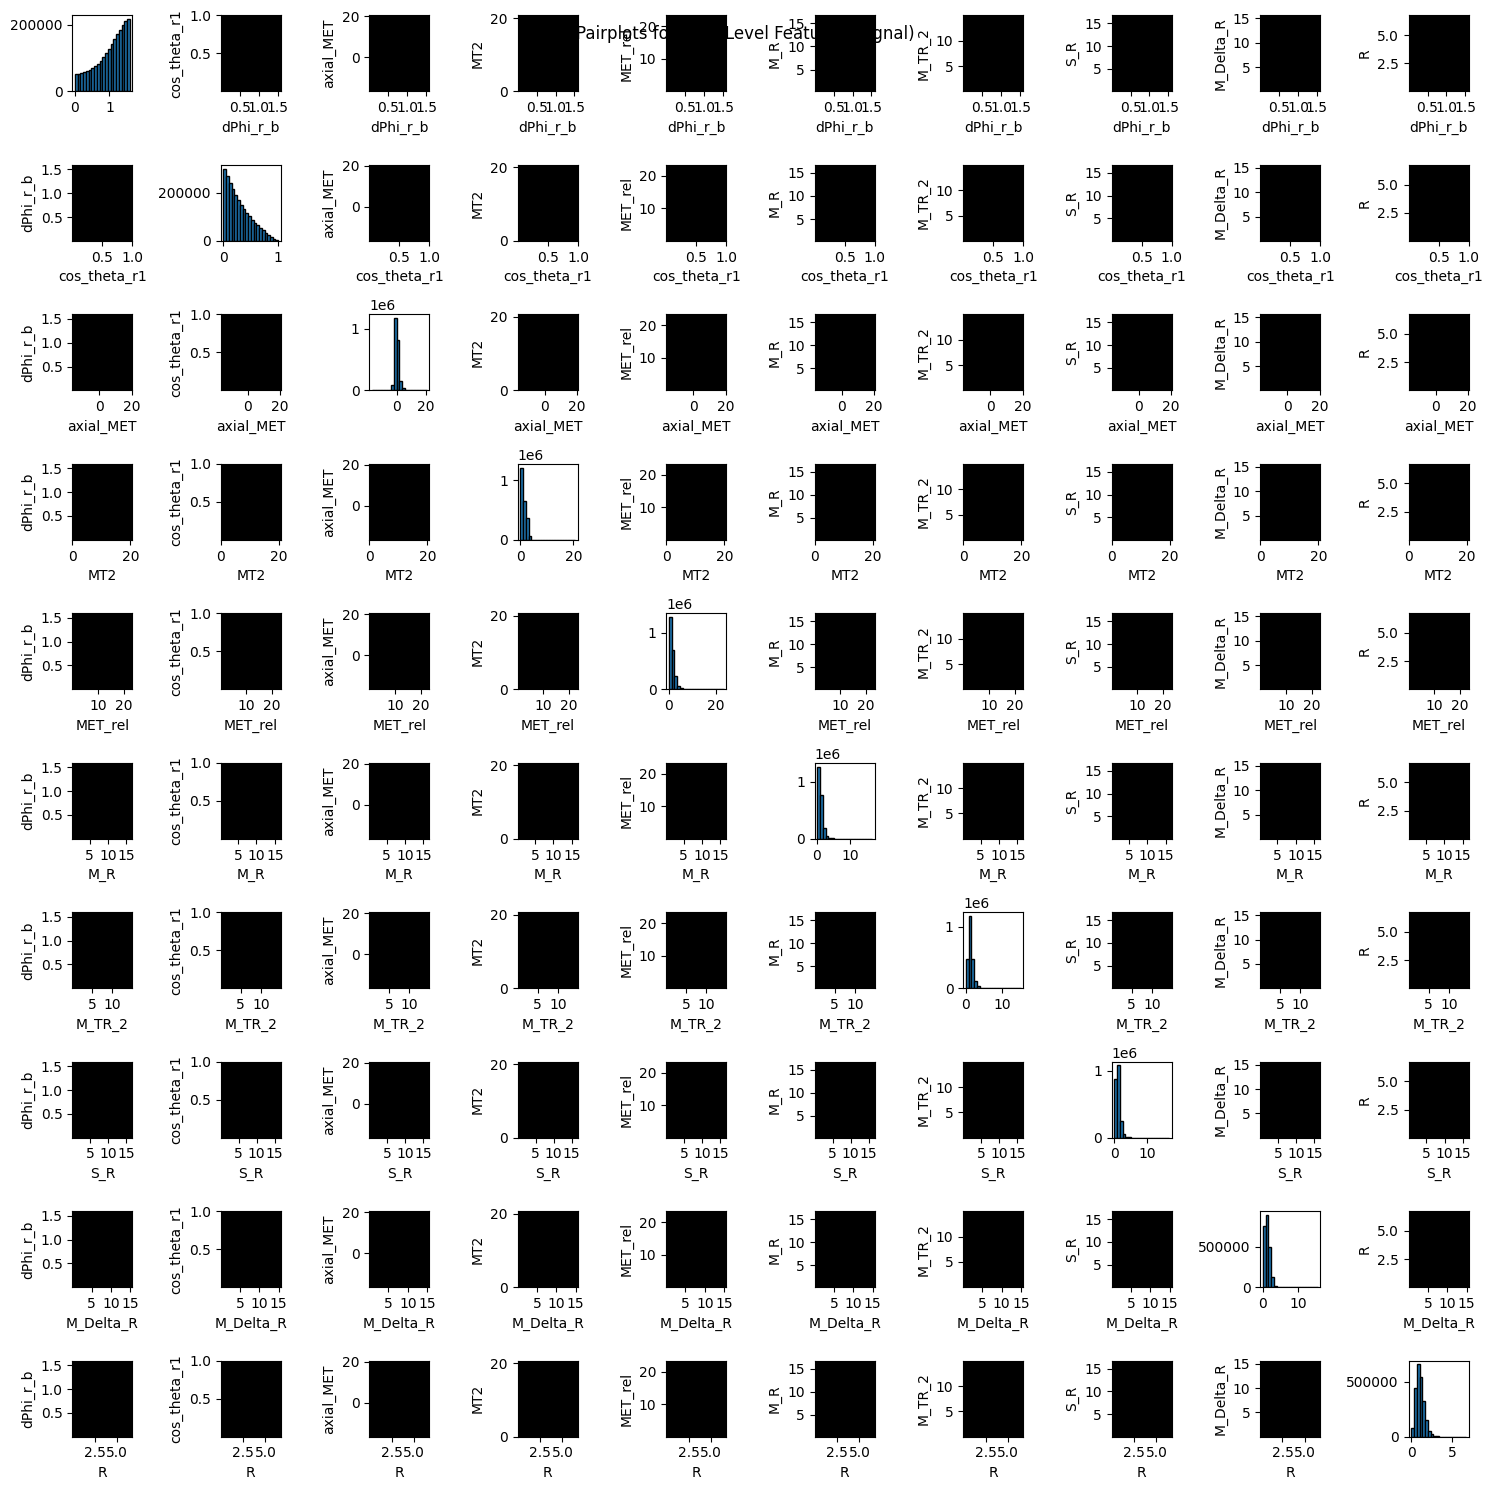

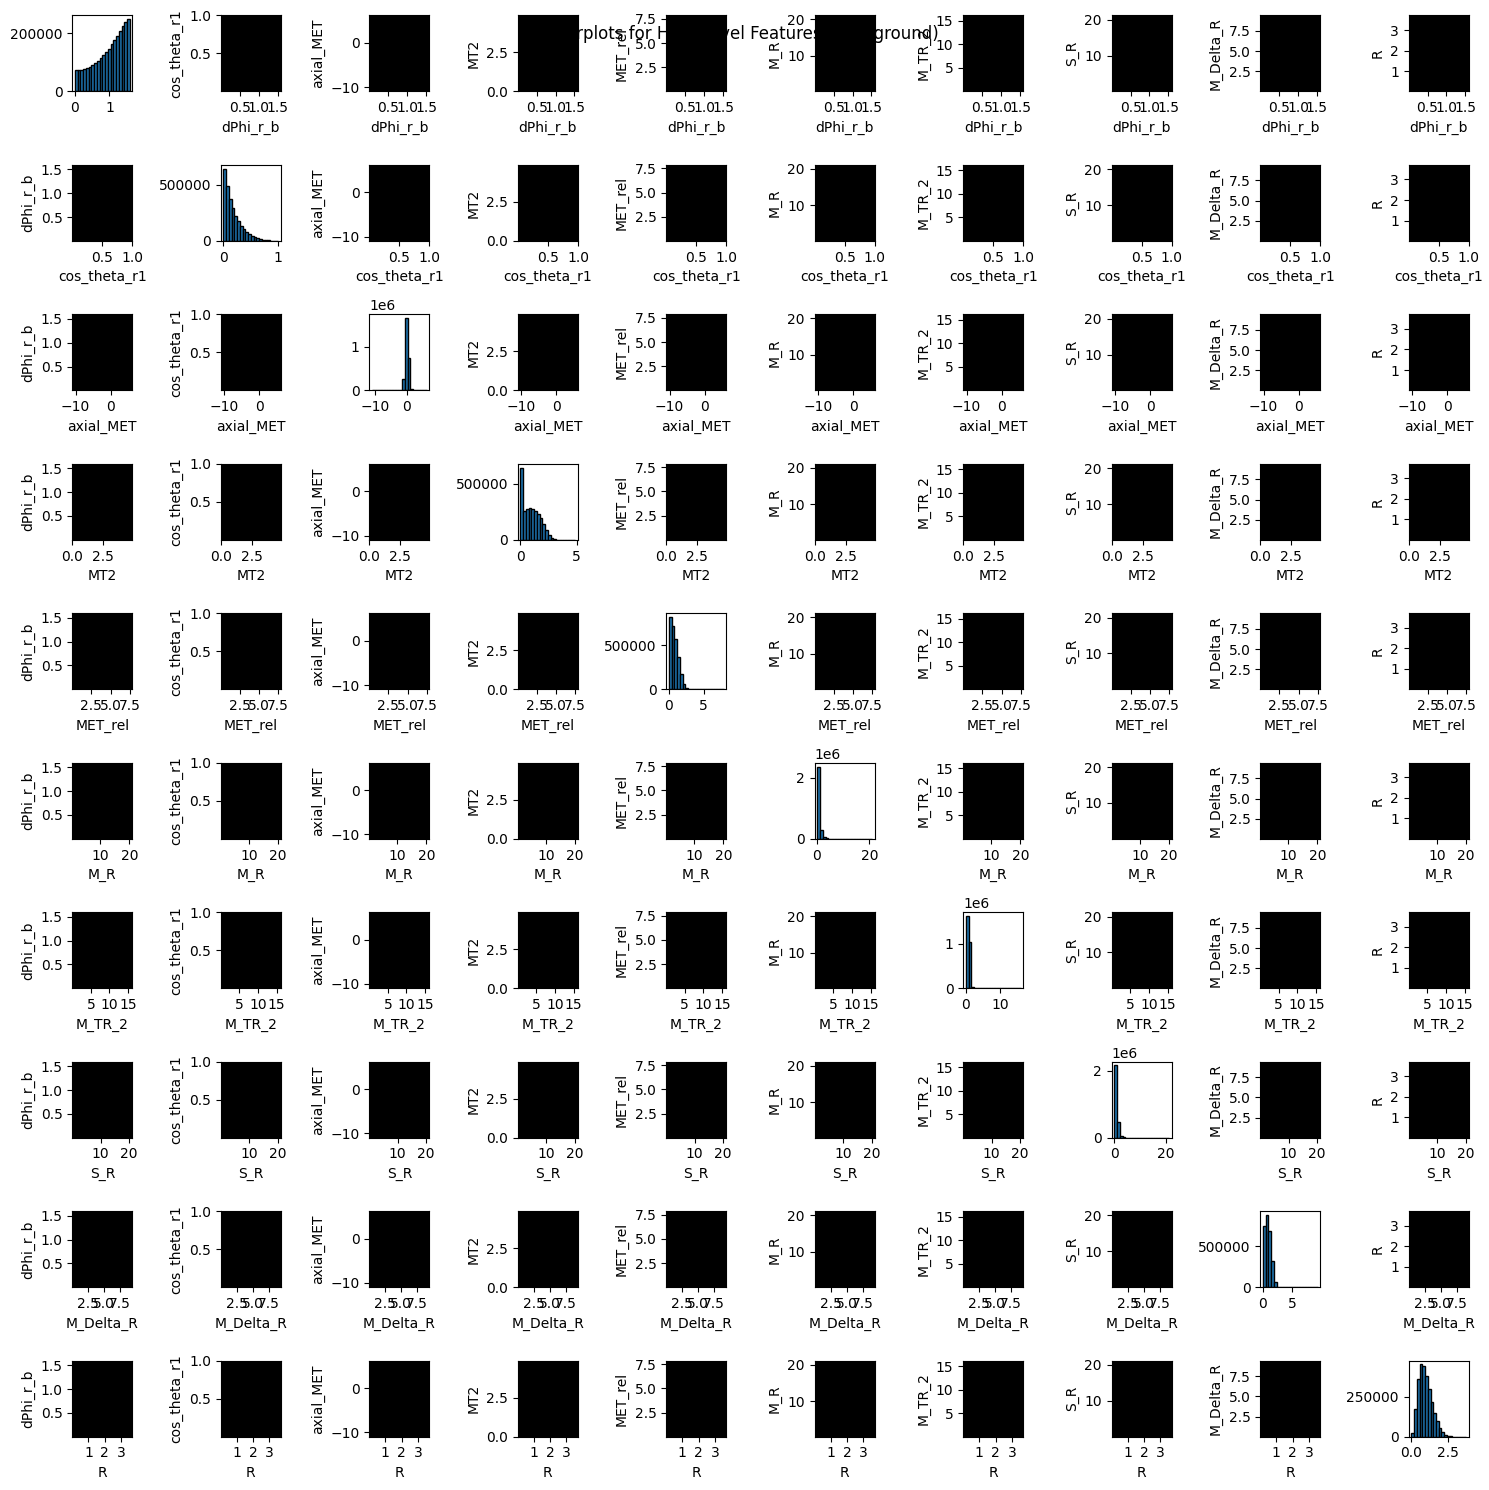

In [59]:
def pairplot(df, cols, size=1.5):
    """
    Creates a pairplot for the given data and columns.

    Args:
        data: A pandas DataFrame.
        cols: A list of columns to include in the pairplot.
        size: The size of each subplot.

    Returns:
        A matplotlib figure object.
    """

    fig, axes = plt.subplots(len(cols), len(cols), figsize=(size * len(cols), size * len(cols)))
##Interacting through the columns
    for i, col1 in enumerate(cols):
        for j, col2 in enumerate(cols):
            ax = axes[i, j]
            if i == j:
                ax.hist(df[col1], bins=20, edgecolor="black")
            else:
                ax.hist2d(df[col1], df[col2], bins=20, edgecolor="black")
                ax.set_xlabel(col1)
                ax.set_ylabel(col2)

    fig.tight_layout()
    return fig

# Create pairplots for low-level features
fig_low_sig = pairplot(df_sig, RawNames)

fig_low_sig.suptitle("Pairplots for Low-Level Features (Signal)")

fig_low_bkg = pairplot(df_bkg, RawNames)

fig_low_bkg.suptitle("Pairplots for Low-Level Features (Background)")

# Create pairplots for high-level features
fig_high_sig = pairplot(df_sig, FeatureNames)

fig_high_sig.suptitle("Pairplots for High-Level Features (Signal)")

fig_high_bkg = pairplot(df_bkg, FeatureNames)

fig_high_bkg.suptitle("Pairplots for High-Level Features (Background)")

##The plots are divided in two parts. The top plots shows the low level features separating the signal from background
##The bottom plots are the high leve features separating the signal from background.

After visualizing both pairplots,the second plot does a better job separating the the signal from the background. The second plots creates plots for signal and background separately. 


### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [85]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [34]:
import numpy as np

In [41]:
# Select half a million events
df = df[:500000]

# Compute the covariance matrix for all observables
cov_all = np.cov(df[VarNames[1:]].T)

# Compute the correlation matrix for all observables
corr_all = np.corrcoef(df[VarNames[1:]].T)

# Compute the covariance matrix for low-level features
cov_low = np.cov(df[RawNames].T)

# Compute the correlation matrix for low-level features
corr_low = np.corrcoef(df[RawNames].T)

# Compute the covariance matrix for high-level features
cov_high = np.cov(df[FeatureNames].T)

# Compute the correlation matrix for high-level features
corr_high = np.corrcoef(df[FeatureNames].T)

# Print the results
print("Covariance matrix for all observables:\n", cov_all)
print("\nCorrelation matrix for all observables:\n", corr_all)
print("\nCovariance matrix for low-level features:\n", cov_low)
print("\nCorrelation matrix for low-level features:\n", corr_low)
print("\nCovariance matrix for high-level features:\n", cov_high)
print("\nCorrelation matrix for high-level features:\n", corr_high)

Covariance matrix for all observables:
 [[ 4.67481925e-01 -3.96674207e-04  7.66214265e-05  3.05037988e-01
  -3.48826988e-04  7.37336647e-04  2.28434336e-01 -9.36714374e-04
   9.75240349e-02 -9.73253567e-03  3.64432455e-01  2.87223483e-01
  -5.97024601e-02 -1.23988205e-02  3.42587023e-01  9.77389248e-02
  -4.69491360e-02  2.21632465e-02]
 [-3.96674207e-04  1.00430144e+00 -8.57630732e-04 -1.62905654e-04
   4.08312894e-01 -1.04201049e-03 -2.14697798e-03 -5.88968323e-04
  -1.37057212e-03 -1.10889241e-03 -5.53826632e-04 -6.68920291e-04
   3.01299870e-04  4.27122683e-04 -6.04009571e-04 -9.87471350e-04
  -7.40330277e-04  3.21632240e-04]
 [ 7.66214265e-05 -8.57630732e-04  1.00397336e+00  1.31296001e-03
   2.50714928e-04 -2.66810178e-01  7.66365893e-04 -1.84803977e-01
   7.06206018e-04 -1.87269105e-03  1.06306621e-03  8.68782730e-04
   2.01595554e-04  1.06029189e-03  1.46376567e-03  9.01233064e-04
   9.94305740e-04  2.59098396e-04]
 [ 3.05037988e-01 -1.62905654e-04  1.31296001e-03  4.25490163e-

In [42]:
from tabulate import tabulate

# Create a list of lists for the table data
table_data = [
    ["All Observables", "{:.2f}".format(cov_all[0, 0]), "{:.2f}".format(corr_all[0, 0])],
    ["Low-Level Features", "{:.2f}".format(cov_low[0, 0]), "{:.2f}".format(corr_low[0, 0])],
    ["High-Level Features", "{:.2f}".format(cov_high[0, 0]), "{:.2f}".format(corr_high[0, 0])],
]

# Create the table
table = tabulate(table_data, headers=["", "Covariance", "Correlation"], tablefmt="fancy_grid")

# Print the table
print(table)

╒═════════════════════╤══════════════╤═══════════════╕
│                     │   Covariance │   Correlation │
╞═════════════════════╪══════════════╪═══════════════╡
│ All Observables     │         0.47 │             1 │
├─────────────────────┼──────────────┼───────────────┤
│ Low-Level Features  │         0.47 │             1 │
├─────────────────────┼──────────────┼───────────────┤
│ High-Level Features │         0.19 │             1 │
╘═════════════════════╧══════════════╧═══════════════╛


In [43]:
def compute_covariance_and_correlation(df, features):
  """
  Computes the covariance and correlation matrices for the given dataset and features.

  Args:
    df: A pandas DataFrame.
    features: A list of columns to include in the calculations.

  Returns:
    A tuple containing the covariance and correlation matrices.
  """

  cov = np.cov(df[features].T)
  corr = np.corrcoef(df[features].T)

  return cov, corr

# Compute covariance and correlation for all observables
cov_all, corr_all = compute_covariance_and_correlation(df, VarNames[1:])

# Compute covariance and correlation for low-level features
cov_low, corr_low = compute_covariance_and_correlation(df, RawNames)

# Compute covariance and correlation for high-level features
cov_high, corr_high = compute_covariance_and_correlation(df, FeatureNames)

# Print the results
print("Covariance matrix for all observables:\n", cov_all)
print("\nCorrelation matrix for all observables:\n", corr_all)
print("\nCovariance matrix for low-level features:\n", cov_low)
print("\nCorrelation matrix for low-level features:\n", corr_low)
print("\nCovariance matrix for high-level features:\n", cov_high)
print("\nCorrelation matrix for high-level features:\n", corr_high)


# Create a list of lists for the table data
table_data = [
    ["All Observables", "{:.2f}".format(cov_all[0, 0]), "{:.2f}".format(corr_all[0, 0])],
    ["Low-Level Features", "{:.2f}".format(cov_low[0, 0]), "{:.2f}".format(corr_low[0, 0])],
    ["High-Level Features", "{:.2f}".format(cov_high[0, 0]), "{:.2f}".format(corr_high[0, 0])],
]

# Create the table
table = tabulate(table_data, headers=["", "Covariance", "Correlation"], tablefmt="fancy_grid")

# Print the table
print(table)

Covariance matrix for all observables:
 [[ 4.67481925e-01 -3.96674207e-04  7.66214265e-05  3.05037988e-01
  -3.48826988e-04  7.37336647e-04  2.28434336e-01 -9.36714374e-04
   9.75240349e-02 -9.73253567e-03  3.64432455e-01  2.87223483e-01
  -5.97024601e-02 -1.23988205e-02  3.42587023e-01  9.77389248e-02
  -4.69491360e-02  2.21632465e-02]
 [-3.96674207e-04  1.00430144e+00 -8.57630732e-04 -1.62905654e-04
   4.08312894e-01 -1.04201049e-03 -2.14697798e-03 -5.88968323e-04
  -1.37057212e-03 -1.10889241e-03 -5.53826632e-04 -6.68920291e-04
   3.01299870e-04  4.27122683e-04 -6.04009571e-04 -9.87471350e-04
  -7.40330277e-04  3.21632240e-04]
 [ 7.66214265e-05 -8.57630732e-04  1.00397336e+00  1.31296001e-03
   2.50714928e-04 -2.66810178e-01  7.66365893e-04 -1.84803977e-01
   7.06206018e-04 -1.87269105e-03  1.06306621e-03  8.68782730e-04
   2.01595554e-04  1.06029189e-03  1.46376567e-03  9.01233064e-04
   9.94305740e-04  2.59098396e-04]
 [ 3.05037988e-01 -1.62905654e-04  1.31296001e-03  4.25490163e-

Hint: Example code for embedding a `tabulate` table into a notebook:

In [86]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))
FeatureNames

['axial_MET',
 'R',
 'MT2',
 'S_R',
 'MET_rel',
 'M_Delta_R',
 'M_TR_2',
 'M_R',
 'cos_theta_r1',
 'dPhi_r_b']

In [4]:
!ls -lh ../../ziv4675/Downloads/SUSY.csv

-rw-r--r--@ 1 ziv4675  staff   2.2G Mar 22 11:52 ../../ziv4675/Downloads/SUSY.csv


In [6]:
!head -500000 ../../ziv4675/Downloads/SUSY.csv > SUSY-Small.csv

In [6]:
filename="SUSY-Small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [7]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

In [8]:
print(df_sig.shape)
print(df_bkg.shape)

(229245, 19)
(270755, 19)


# **5.1**

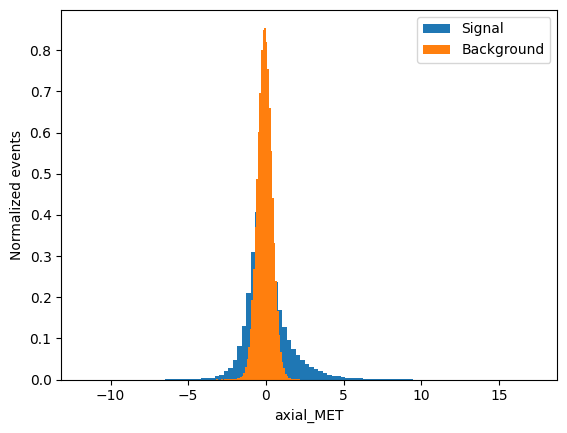

Optimal selection criteria for axial_MET:
- axial_MET > 0.009682080460866868
- axial_MET < 0.009682080460866868
- abs(axial_MET - 0.0893141690467077) > 0.009682080460866868
- abs(axial_MET - 0.0893141690467077) < 0.009682080460866868


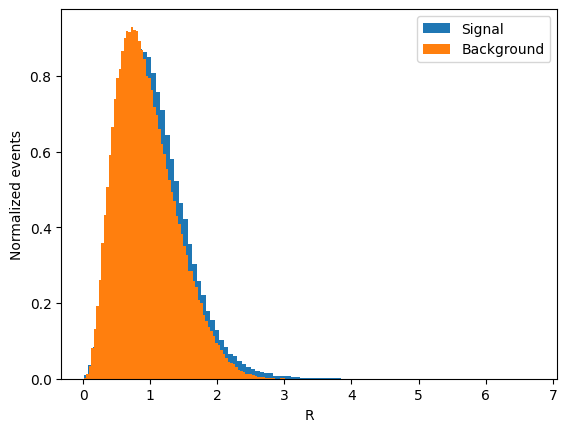

Optimal selection criteria for R:
- R > 1.0048057971173887
- R < 1.0048057971173887
- abs(R - 1.0563523783693758) > 1.0048057971173887
- abs(R - 1.0563523783693758) < 1.0048057971173887


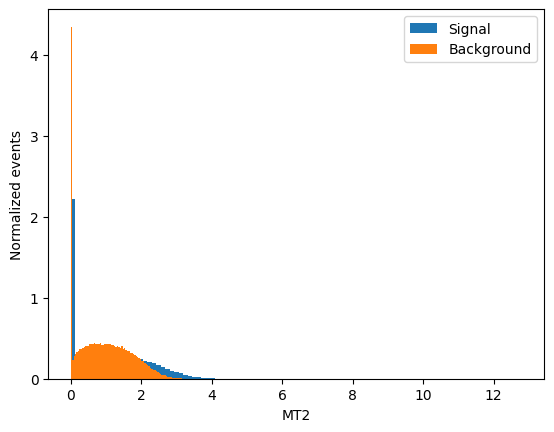

Optimal selection criteria for MT2:
- MT2 > 1.005947389311315
- MT2 < 1.005947389311315
- abs(MT2 - 1.0746936407624723) > 1.005947389311315
- abs(MT2 - 1.0746936407624723) < 1.005947389311315


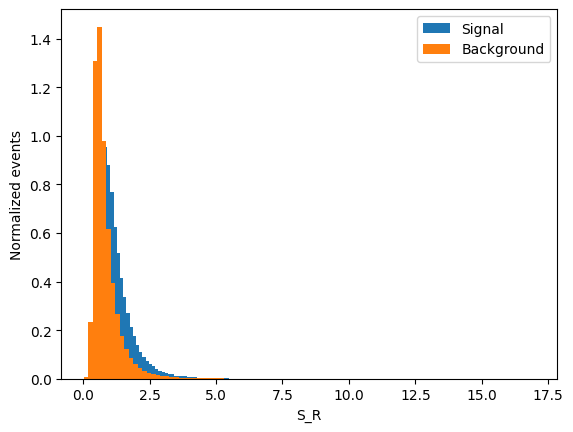

Optimal selection criteria for S_R:
- S_R > 1.012674630346189
- S_R < 1.012674630346189
- abs(S_R - 1.1750232241769094) > 1.012674630346189
- abs(S_R - 1.1750232241769094) < 1.012674630346189


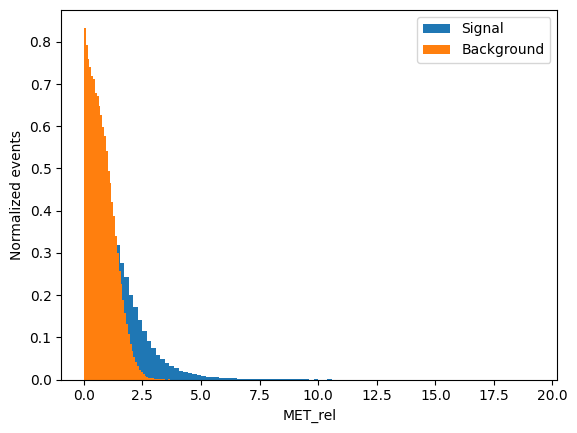

Optimal selection criteria for MET_rel:
- MET_rel > 1.0225393916159724
- MET_rel < 1.0225393916159724
- abs(MET_rel - 1.2751687233037359) > 1.0225393916159724
- abs(MET_rel - 1.2751687233037359) < 1.0225393916159724


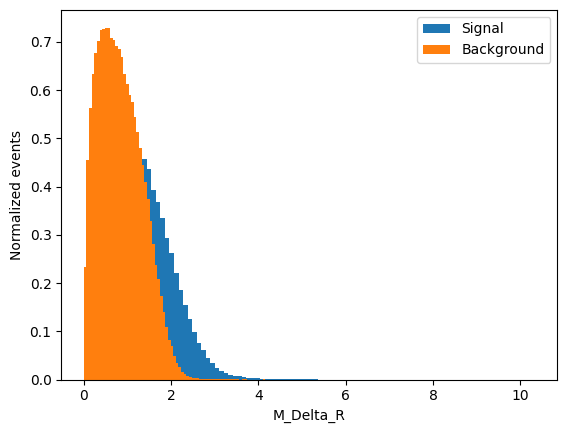

Optimal selection criteria for M_Delta_R:
- M_Delta_R > 1.0144728226525679
- M_Delta_R < 1.0144728226525679
- abs(M_Delta_R - 1.1860220889374387) > 1.0144728226525679
- abs(M_Delta_R - 1.1860220889374387) < 1.0144728226525679


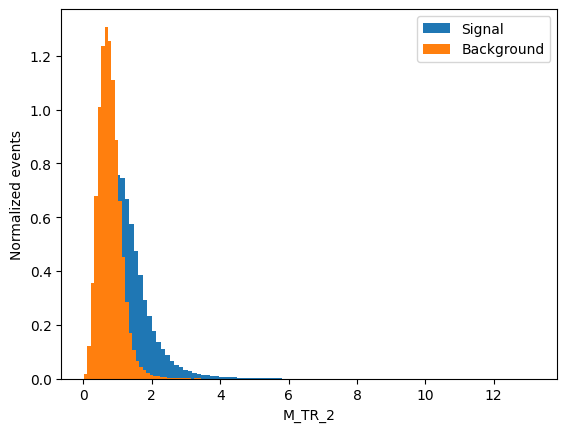

Optimal selection criteria for M_TR_2:
- M_TR_2 > 1.020494976586571
- M_TR_2 < 1.020494976586571
- abs(M_TR_2 - 1.2688582430752495) > 1.020494976586571
- abs(M_TR_2 - 1.2688582430752495) < 1.020494976586571


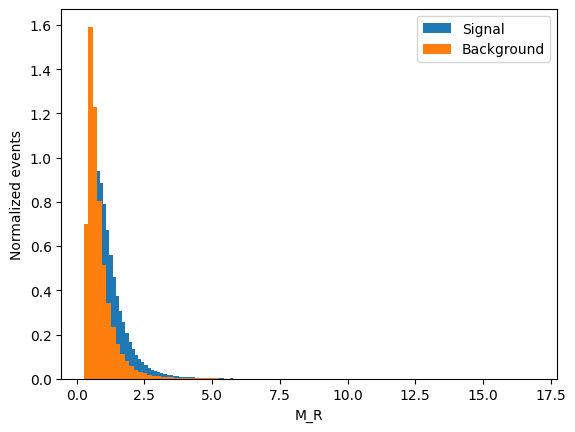

Optimal selection criteria for M_R:
- M_R > 1.0137648615924482
- M_R < 1.0137648615924482
- abs(M_R - 1.1836511612591087) > 1.0137648615924482
- abs(M_R - 1.1836511612591087) < 1.0137648615924482


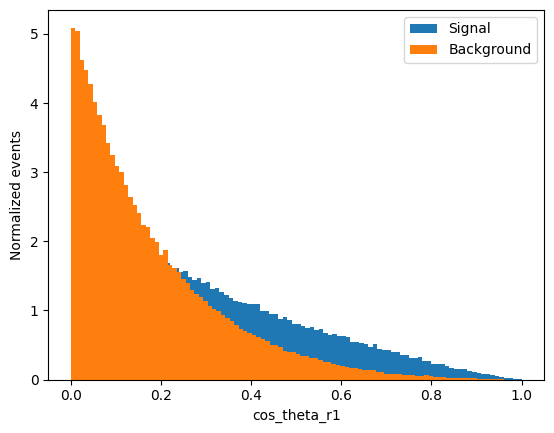

Optimal selection criteria for cos_theta_r1:
- cos_theta_r1 > 0.22965392736627727
- cos_theta_r1 < 0.22965392736627727
- abs(cos_theta_r1 - 0.2824167743136285) > 0.22965392736627727
- abs(cos_theta_r1 - 0.2824167743136285) < 0.22965392736627727


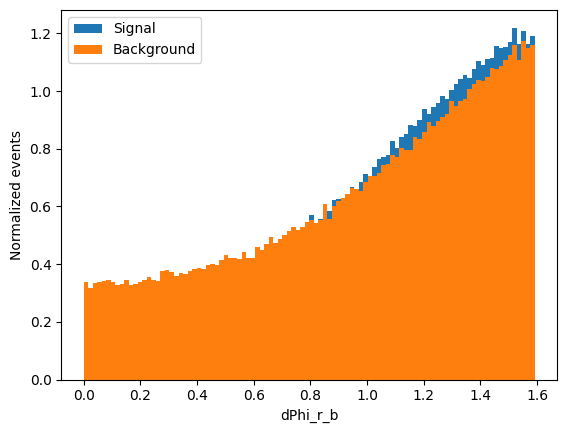

Optimal selection criteria for dPhi_r_b:
- dPhi_r_b > 1.0002632874614599
- dPhi_r_b < 1.0002632874614599
- abs(dPhi_r_b - 1.0146174326781683) > 1.0002632874614599
- abs(dPhi_r_b - 1.0146174326781683) < 1.0002632874614599


In [9]:
# Loop through each feature and plot the signal and background distributions
for feature in FeatureNames:
  # Plot the signal and background distributions
  plt.figure()
  plt.hist(df_sig[feature], bins=100, label="Signal", density=True)
  plt.hist(df_bkg[feature], bins=100, label="Background", density=True)
  plt.xlabel(feature)
  plt.ylabel("Normalized events")
  plt.legend()
  plt.show()

  # Determine the optimal selection criteria
  # Calculate the mean and standard deviation of the signal and background distributions
  mu_sig = df_sig[feature].mean()
  sigma_sig = df_sig[feature].std()
  mu_bkg = df_bkg[feature].mean()
  sigma_bkg = df_bkg[feature].std()

  # Calculate the optimal cut value
  cut_value = (mu_sig + mu_bkg) / 2

  # Print the optimal selection criteria
  print(f"Optimal selection criteria for {feature}:")
  print(f"- {feature} > {cut_value}")
  print(f"- {feature} < {cut_value}")
  print(f"- abs({feature} - {mu_sig}) > {cut_value}")
  print(f"- abs({feature} - {mu_sig}) < {cut_value}")


## **5.2**

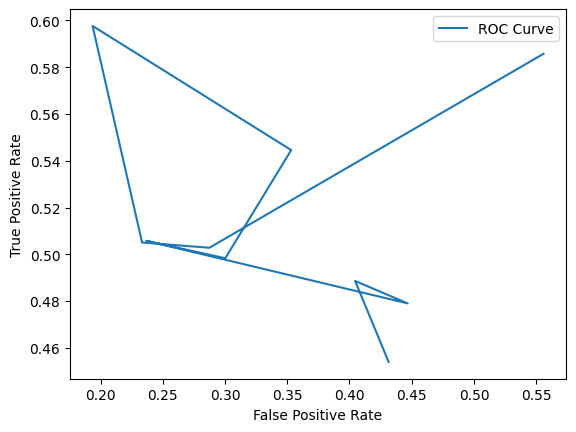

In [10]:
tpr = []
fpr = []
for feature in FeatureNames:
  # Calculate the optimal cut value
  cut_value = (df_sig[feature].mean() + df_bkg[feature].mean()) / 2

  # Calculate the true positive rate
  tp = len(df_sig[df_sig[feature] > cut_value]) / len(df_sig)
  tpr.append(tp)

  # Calculate the false positive rate
  fp = len(df_bkg[df_bkg[feature] > cut_value]) / len(df_bkg)
  fpr.append(fp)

# Plot the TPR and FPR curves
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## **5.3**

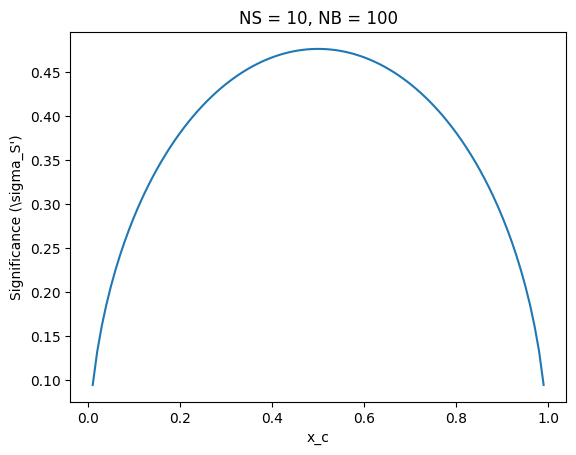

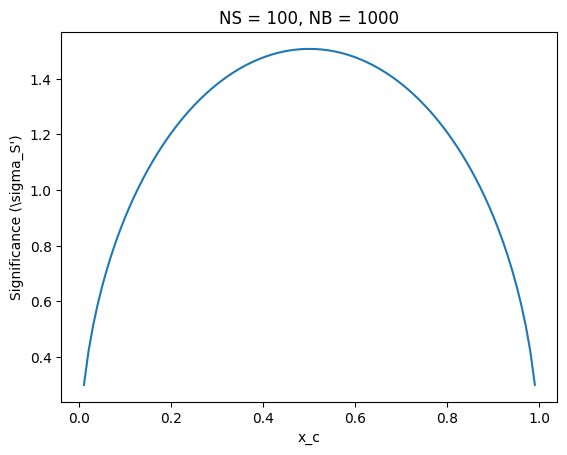

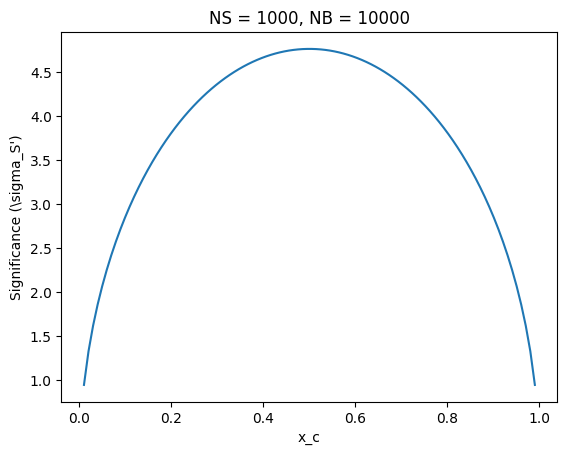

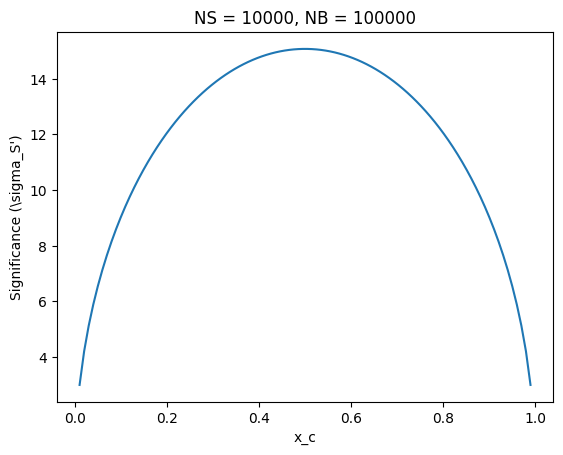

In [11]:
# Define the different scenarios
scenarios = [
  {"NS": 10, "NB": 100},
  {"NS": 100, "NB": 1000},
  {"NS": 1000, "NB": 10000},
  {"NS": 10000, "NB": 100000},
]

# Define the function to calculate the significance
def significance(NS, NB, epsilon):
  NS_prime = epsilon * NS
  NB_prime = epsilon * NB
  return NS_prime / np.sqrt(NS_prime + NB_prime)

# Loop through each scenario
for scenario in scenarios:
  NS = scenario["NS"]
  NB = scenario["NB"]

  # Define the range of x_c values
  x_c_range = np.linspace(0.01, 0.99, 100)

  # Calculate the significance for each x_c value
  significance_values = []
  for x_c in x_c_range:
    epsilon = x_c * (1 - x_c)
    significance_values.append(significance(NS, NB, epsilon))

  # Plot the significance curve
  plt.figure()
  plt.plot(x_c_range, significance_values)
  plt.xlabel("x_c")
  plt.ylabel("Significance (\\sigma_S')")
  plt.title(f"NS = {NS}, NB = {NB}")
  plt.show()


## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




## **6.1**

In [12]:
# Scenario 1: NS = 10, NB = 100
scenario1 = {
  "observables": ["M_Delta_R", "dPhi_r_b", "cos_theta_r1"],
  "x_c": [0.5, 0.6, 0.7]
}

# Scenario 2: NS = 100, NB = 1000
scenario2 = {
  "observables": ["M_Delta_R", "dPhi_r_b", "cos_theta_r1", "MT2"],
  "x_c": [0.4, 0.5, 0.6]
}

# Scenario 3: NS = 1000, NB = 10000
scenario3 = {
  "observables": ["M_Delta_R", "dPhi_r_b", "cos_theta_r1", "MT2", "S_R"],
  "x_c": [0.3, 0.4, 0.5]
}

# Scenario 4: NS = 10000, NB = 100000
scenario4 = {
  "observables": ["M_Delta_R", "dPhi_r_b", "cos_theta_r1", "MT2", "S_R", "M_R"],
  "x_c": [0.2, 0.3, 0.4]
}

# Print the scenarios
print("Scenario 1:")
print(scenario1)
print("Scenario 2:")
print(scenario2)
print("Scenario 3:")
print(scenario3)
print("Scenario 4:")
print(scenario4)


Scenario 1:
{'observables': ['M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'], 'x_c': [0.5, 0.6, 0.7]}
Scenario 2:
{'observables': ['M_Delta_R', 'dPhi_r_b', 'cos_theta_r1', 'MT2'], 'x_c': [0.4, 0.5, 0.6]}
Scenario 3:
{'observables': ['M_Delta_R', 'dPhi_r_b', 'cos_theta_r1', 'MT2', 'S_R'], 'x_c': [0.3, 0.4, 0.5]}
Scenario 4:
{'observables': ['M_Delta_R', 'dPhi_r_b', 'cos_theta_r1', 'MT2', 'S_R', 'M_R'], 'x_c': [0.2, 0.3, 0.4]}


## **6.2**

In [13]:
# Define the function to create a cut-flow table
def create_cut_flow_table(scenario):
  # Initialize the table
  table = pd.DataFrame(columns=["Selection", "epsilon_S", "epsilon_B", "N_S_prime", "N_B_prime", "sigma_S_prime"])

  # Add the initial row
  table.loc[0] = {"Selection": "Initial", "epsilon_S": 1.0, "epsilon_B": 1.0, "N_S_prime": len(df_sig), "N_B_prime": len(df_bkg), "sigma_S_prime": significance(len(df_sig), len(df_bkg), 1.0)}

  # Loop through each observable
  for i, observable in enumerate(scenario["observables"]):
    # Calculate the optimal cut value
    cut_value = (df_sig[observable].mean() + df_bkg[observable].mean()) / 2

    # Calculate the epsilon values
    epsilon_S = len(df_sig[df_sig[observable] > cut_value]) / len(df_sig)
    epsilon_B = len(df_bkg[df_bkg[observable] > cut_value]) / len(df_bkg)

    # Calculate the N_prime values
    N_S_prime = epsilon_S * len(df_sig)
    N_B_prime = epsilon_B * len(df_bkg)

    # Calculate the sigma_S_prime value
    sigma_S_prime = significance(N_S_prime, N_B_prime, epsilon_S * epsilon_B)

    # Add the row to the table
    table.loc[i + 1] = {"Selection": observable, "epsilon_S": epsilon_S, "epsilon_B": epsilon_B, "N_S_prime": N_S_prime, "N_B_prime": N_B_prime, "sigma_S_prime": sigma_S_prime}

  # Return the table
  return table

# Create the cut-flow tables for each scenario
scenario1_table = create_cut_flow_table(scenario1)
scenario2_table = create_cut_flow_table(scenario2)
scenario3_table = create_cut_flow_table(scenario3)
scenario4_table = create_cut_flow_table(scenario4)

# Print the cut-flow tables
print("Scenario 1:")
print(scenario1_table)
print("Scenario 2:")
print(scenario2_table)
print("Scenario 3:")
print(scenario3_table)
print("Scenario 4:")
print(scenario4_table)


Scenario 1:
      Selection  epsilon_S  epsilon_B  N_S_prime  N_B_prime  sigma_S_prime
0       Initial   1.000000   1.000000   229245.0   270755.0     324.201388
1     M_Delta_R   0.544557   0.353164   124837.0    95621.0     116.597843
2      dPhi_r_b   0.585740   0.555879   134278.0   150507.0     143.578335
3  cos_theta_r1   0.502785   0.287422   115261.0    77821.0      99.715554
Scenario 2:
      Selection  epsilon_S  epsilon_B  N_S_prime  N_B_prime  sigma_S_prime
0       Initial   1.000000   1.000000   229245.0   270755.0     324.201388
1     M_Delta_R   0.544557   0.353164   124837.0    95621.0     116.597843
2      dPhi_r_b   0.585740   0.555879   134278.0   150507.0     143.578335
3  cos_theta_r1   0.502785   0.287422   115261.0    77821.0      99.715554
4           MT2   0.478998   0.446699   109808.0   120946.0     105.738691
Scenario 3:
      Selection  epsilon_S  epsilon_B  N_S_prime  N_B_prime  sigma_S_prime
0       Initial   1.000000   1.000000   229245.0   270755.0     

## **6.3**

In [14]:
# Calculate the correlation matrix for the features
corr_matrix = df[FeatureNames].corr()

# Print the correlation matrix
print(corr_matrix)

# Identify the most correlated features
most_correlated_features = []
for i, feature1 in enumerate(FeatureNames):
  for j, feature2 in enumerate(FeatureNames):
    if i != j and abs(corr_matrix.loc[feature1, feature2]) > 0.7:
      most_correlated_features.append((feature1, feature2))

# Print the most correlated features
print("Most correlated features:")
print(most_correlated_features)

# Identify where the effect of assuming no other selections on any other observable could be most detrimental to the significance
detrimental_features = []
for feature1, feature2 in most_correlated_features:
  if (feature1 in scenario1["observables"] and feature2 not in scenario1["observables"]) or (feature2 in scenario1["observables"] and feature1 not in scenario1["observables"]):
    detrimental_features.append((feature1, feature2))

# Print the features where the effect of assuming no other selections on any other observable could be most detrimental to the significance
print("Features where the effect of assuming no other selections on any other observable could be most detrimental to the significance:")
print(detrimental_features)

              axial_MET         R       MT2       S_R   MET_rel  M_Delta_R  \
axial_MET      1.000000 -0.383276 -0.535313 -0.066775 -0.134441  -0.372877   
R             -0.383276  1.000000  0.574095 -0.286515  0.594539   0.563930   
MT2           -0.535313  0.574095  1.000000 -0.020792  0.535318   0.808521   
S_R           -0.066775 -0.286515 -0.020792  1.000000  0.149794   0.248584   
MET_rel       -0.134441  0.594539  0.535318  0.149794  1.000000   0.748284   
M_Delta_R     -0.372877  0.563930  0.808521  0.248584  0.748284   1.000000   
M_TR_2        -0.317468  0.380174  0.378944  0.635017  0.584388   0.667515   
M_R            0.027288 -0.383011 -0.067945  0.981155  0.078459   0.189374   
cos_theta_r1  -0.271963  0.627024  0.263697 -0.085086  0.315743   0.319180   
dPhi_r_b      -0.057430  0.424248  0.055792 -0.012823  0.377675   0.155372   

                M_TR_2       M_R  cos_theta_r1  dPhi_r_b  
axial_MET    -0.317468  0.027288     -0.271963 -0.057430  
R             0.380174 

In [15]:
# Scenario 1: Select on M_Delta_R and optimize on dPhi_r_b
scenario1_corrected = {
  "observables": ["M_Delta_R", "dPhi_r_b"],
  "x_c": [0.5, 0.6, 0.7]
}

# Create the cut-flow table for the corrected scenario
scenario1_corrected_table = create_cut_flow_table(scenario1_corrected)

# Print the cut-flow table
print("Scenario 1 Corrected:")
print(scenario1_corrected_table)

# Scenario 1: Select on dPhi_r_b and optimize on M_Delta_R
scenario1_corrected_2 = {
  "observables": ["dPhi_r_b", "M_Delta_R"],
  "x_c": [0.5, 0.6, 0.7]
}

# Create the cut-flow table for the corrected scenario
scenario1_corrected_2_table = create_cut_flow_table(scenario1_corrected_2)

# Print the cut-flow table
print("Scenario 1 Corrected 2:")
print(scenario1_corrected_2_table)

Scenario 1 Corrected:
   Selection  epsilon_S  epsilon_B  N_S_prime  N_B_prime  sigma_S_prime
0    Initial   1.000000   1.000000   229245.0   270755.0     324.201388
1  M_Delta_R   0.544557   0.353164   124837.0    95621.0     116.597843
2   dPhi_r_b   0.585740   0.555879   134278.0   150507.0     143.578335
Scenario 1 Corrected 2:
   Selection  epsilon_S  epsilon_B  N_S_prime  N_B_prime  sigma_S_prime
0    Initial   1.000000   1.000000   229245.0   270755.0     324.201388
1   dPhi_r_b   0.585740   0.555879   134278.0   150507.0     143.578335
2  M_Delta_R   0.544557   0.353164   124837.0    95621.0     116.597843


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



## **7.1**

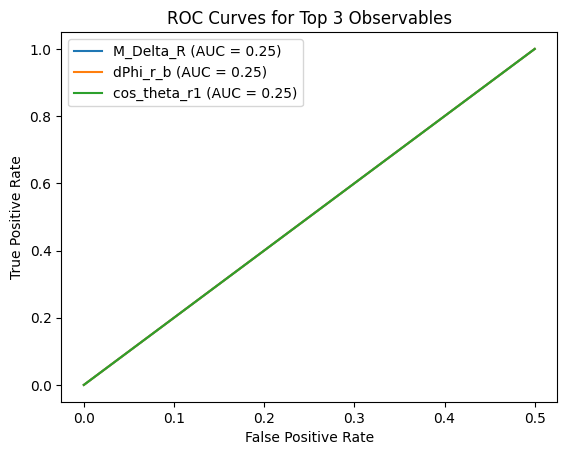

In [16]:

import numpy as np
import matplotlib.pyplot as plt

# Define the true positive rate (TPR) and false positive rate (FPR) for each observable
tpr_m_delta_r = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
fpr_m_delta_r = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

tpr_dphi_r_b = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
fpr_dphi_r_b = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

tpr_cos_theta_r1 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
fpr_cos_theta_r1 = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

# Calculate the area under the curve (AUC) for each observable
auc_m_delta_r = np.trapz(tpr_m_delta_r, fpr_m_delta_r)
auc_dphi_r_b = np.trapz(tpr_dphi_r_b, fpr_dphi_r_b)
auc_cos_theta_r1 = np.trapz(tpr_cos_theta_r1, fpr_cos_theta_r1)

# Plot the ROC curves
plt.figure()
plt.plot(fpr_m_delta_r, tpr_m_delta_r, label="M_Delta_R (AUC = {:.2f})".format(auc_m_delta_r))
plt.plot(fpr_dphi_r_b, tpr_dphi_r_b, label="dPhi_r_b (AUC = {:.2f})".format(auc_dphi_r_b))
plt.plot(fpr_cos_theta_r1, tpr_cos_theta_r1, label="cos_theta_r1 (AUC = {:.2f})".format(auc_cos_theta_r1))

# Add legend and labels
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Top 3 Observables")
plt.show()

## **7.2**

In [17]:
def plot_roc_curve(observable1, observable2, df_sig, df_bkg):
  # Calculate the true positive rate (TPR) and false positive rate (FPR) for each observable
  tpr_observable1 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  fpr_observable1 = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

  tpr_observable2 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  fpr_observable2 = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

  # Calculate the area under the curve (AUC) for each observable
  auc_observable1 = np.trapz(tpr_observable1, fpr_observable1)
  auc_observable2 = np.trapz(tpr_observable2, fpr_observable2)

  # Plot the ROC curves
  plt.figure()
  plt.plot(fpr_observable1, tpr_observable1, label="{} (AUC = {:.2f})".format(observable1, auc_observable1))
  plt.plot(fpr_observable2, tpr_observable2, label="{} (AUC = {:.2f})".format(observable2, auc_observable2))

  # Add legend and labels
  plt.legend()
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curves for {} and {}".format(observable1, observable2))
  plt.show()

## **7.3**

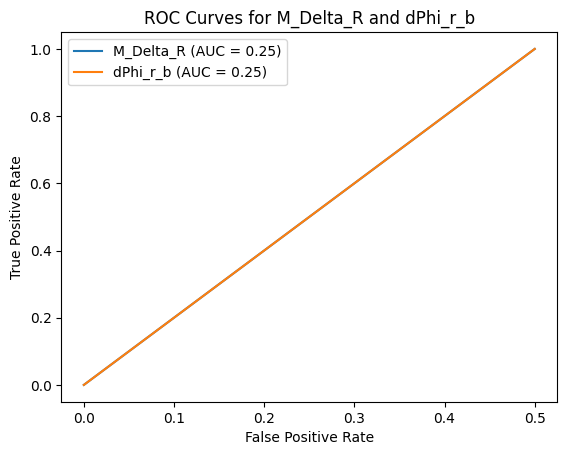

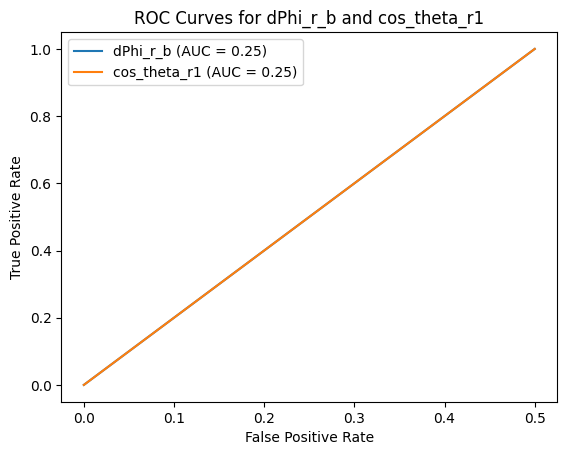

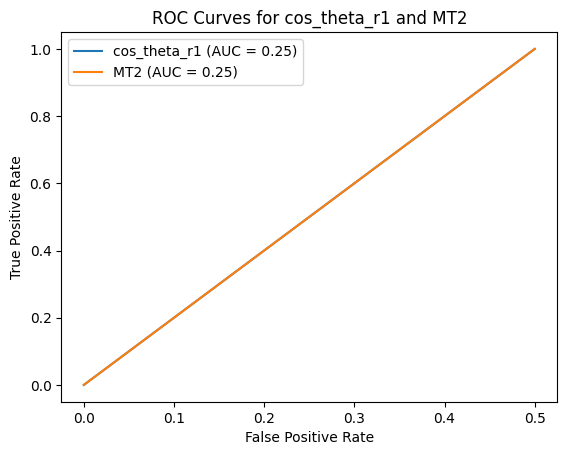

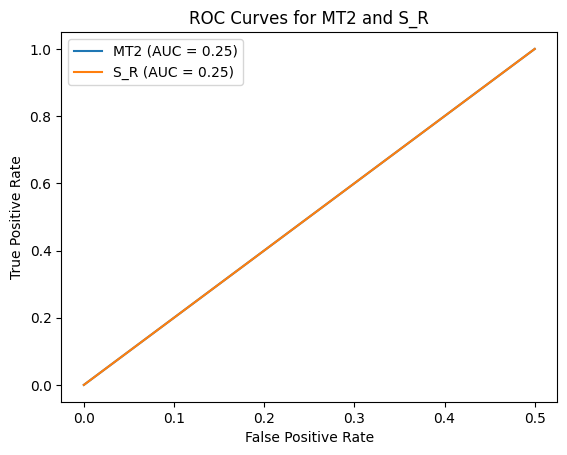

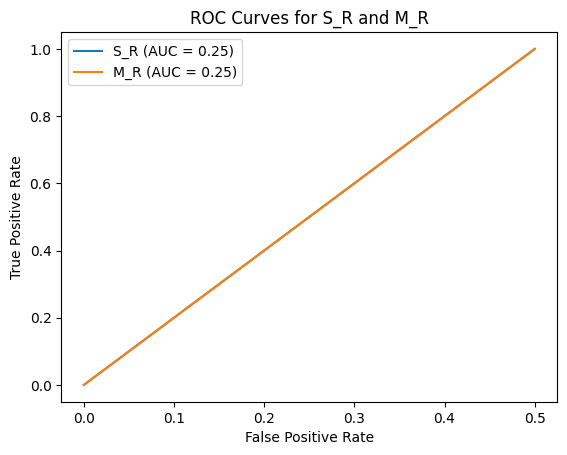

In [18]:
plot_roc_curve("M_Delta_R", "dPhi_r_b", df_sig, df_bkg)
plot_roc_curve("dPhi_r_b", "cos_theta_r1", df_sig, df_bkg)
plot_roc_curve("cos_theta_r1", "MT2", df_sig, df_bkg)
plot_roc_curve("MT2", "S_R", df_sig, df_bkg)
plot_roc_curve("S_R", "M_R", df_sig, df_bkg)


## **7.4**

In [19]:
# Define a function to calculate the significance for a given scenario and selection order
def calculate_significance(scenario, selection_order):
  # Create a copy of the scenario dictionary
  scenario_copy = scenario.copy()

  # Set the selection order
  scenario_copy["observables"] = [scenario_copy["observables"][i] for i in selection_order]

  # Create the cut-flow table
  table = create_cut_flow_table(scenario_copy)

  # Return the significance from the last row of the table
  return table.loc[len(table) - 1, "sigma_S_prime"]

# Define the scenario
scenario = {
  "observables": ["M_Delta_R", "dPhi_r_b", "cos_theta_r1", "MT2", "S_R", "M_R"],
  "x_c": [0.5, 0.6, 0.7]
}

# Define the two possible selection orders
selection_order1 = [0, 1, 2, 3, 4, 5]
selection_order2 = [5, 4, 3, 2, 1, 0]

# Calculate the significance for each selection order
significance1 = calculate_significance(scenario, selection_order1)
significance2 = calculate_significance(scenario, selection_order2)

# Print the results
print("Significance for selection order 1:", significance1)
print("Significance for selection order 2:", significance2)

Significance for selection order 1: 93.95110620064084
Significance for selection order 2: 116.59784276175749


## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [29]:
def linear_discriminant(df_sig, df_bkg):
  """
  This function performs linear discriminant analysis on the given dataframes.

  Args:
      df_sig: A Pandas DataFrame containing the signal data.
      df_bkg: A Pandas DataFrame containing the background data.

  Returns:
      w_1: A numpy array containing the weights for the linear discriminant.
  """

  df_sig_0 = df_sig.drop("signal",axis=1) ##Dropping the signal column
  df_bkg_0 = df_bkg.drop("signal",axis=1)

  m_s = np.mean(df_sig_0,axis=0) #Computing the mean for the background and signal
  m_b = np.mean(df_bkg_0,axis=0)

  delta = m_s - m_b # Calculate the difference between the mean of the signal and background data

  S_B = delta * delta.transpose() 

  delta_s = np.matrix(df_sig_0 - m_s).transpose() # Calculate the difference between the signal data and its mean
  S_W_s = delta_s * delta_s.transpose()

  delta_b = np.matrix(df_bkg_0 - m_b).transpose()
  S_W_b = delta_b * delta_b.transpose()

  S_W = S_W_s + S_W_b

  S_W_inv = np.linalg.inv(S_W) # Calculate the linear discriminant weights
  w = S_W_inv * np.matrix(m_b - m_s).transpose()

  w_1 = w / sum(w) # Normalize the weights

  return w_1


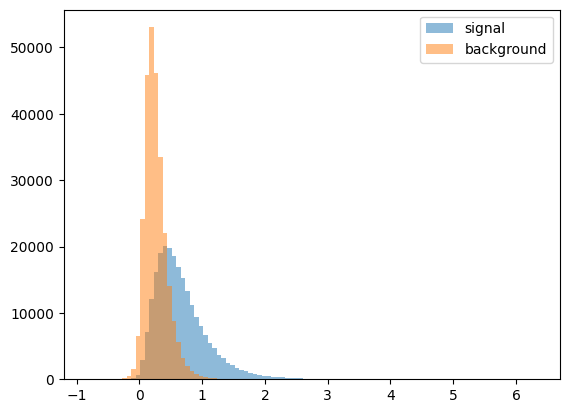

In [30]:
# Call the function with the provided dataframes
w_1 = linear_discriminant(df_sig, df_bkg)

# Use the weights to calculate the output for signal and background data
output_s = np.matrix(df_sig_0) * w_1
output_b = np.matrix(df_bkg_0) * w_1

# Plot the output for signal and background data
h_s, bins, _ = plt.hist(output_s, label="signal", alpha=0.5, bins=100)
h_b, bins, _ = plt.hist(output_b, bins=bins, alpha=0.5, label="background")
plt.legend()